# 3.1 Regression

## 3.2.1 Choose, Load, Inspect and Explore your Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Pujan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Pujan\AppData\Local\Temp\ipykernel_14980\901465343.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**1. When and Who created the dataset?**

Ans. vijayaadithyan V.G created dataset in 2019.

**2. How did you get access to the dataset?**

Ans. I got access to the dataset from kaggle.

**3. List out the attributes (columns) of the dataset.**

Ans. As mentioned earlier, the dataset has the following attributes or columns:

- Car_Name
- Year
- Selling_Price
- Present_Price
- Driven_kms
- Fuel_Type
- Selling_type
- Transmission
- Owner

**4. Probable questions that the dataset could answer:**

- What is the distribution of cars based on their manufacturing year?
- How does the selling price vary with the present price of the cars?
- Is there a correlation between the selling price and the number of kilometers the car has been driven?
- What is the most common fuel type among the listed cars?
- How does the transmission type affect the selling price of the cars?
- Are there any patterns related to the ownership history of the cars and their selling prices?

In [3]:
df.isnull().sum()    # Counts the number of missing values in each column of DataFrame df

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [4]:
all_duplicate_rows = df[df.duplicated(keep=False)]
all_duplicate_rows

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
15,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [5]:
df1 = df.drop_duplicates()
df2 = df1.reset_index(drop=True)
df2

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df2.info()     # Displays a summary of DataFrame df, including the data types and non-null counts for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


In [7]:
df2.describe()    # Descriptive statistics for numerical columns

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Check unique values in categorical columns
print("\nUnique values in 'Car Name' column:")
print(df2['Car_Name'].unique())

print("\nUnique values in 'Fuel Type' column:")
print(df2['Fuel_Type'].unique())

print("\nUnique values in 'Selling Type' column:")
print(df2['Selling_type'].unique())

print("\nUnique values in 'Transmission' column:")
print(df2['Transmission'].unique())


Unique values in 'Car Name' column:
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'B

In [9]:
car_list = ['ritz','ciaz','xs4','wagon r','swift','vitara brezza','s cross','alto 800','ertiga','dzire','alto k10','ignis','800','baleno','omni','fortuner','innova','corolla altis','etios cross','etios g','etios liva','corolla','etios gd','camry','land cruiser','i20','grand i10','i10','eon','xcent','elantra','creta','verna','city','brio','amaze','jazz']
bike_list = ['Royal Enfield Thunder 500','UM Renegade Mojave','KTM RC200', 'Bajaj Dominar 400','Royal Enfield Classic 350','KTM RC390','Hyosung GT250R','Royal Enfield Thunder 350','KTM 390 Duke','Mahindra Mojo XT300','Bajaj Pulsar RS200','Royal Enfield Bullet 350','Royal Enfield Classic 500','Bajaj Avenger 220','Bajaj Avenger 150','Honda CB Hornet 160R','Yamaha FZ S V 2.0','Yamaha FZ 16','Bajaj Pulsar 150','TVS Apache RTR 160','Honda CBR 150','Hero Extreme','Bajaj Avenger 220 dtsi','Bajaj Avenger 150 street','Yamaha FZ  v 2.0','Bajaj Pulsar  NS 200','Bajaj Pulsar 220 F','TVS Apache RTR 180','Hero Passion X pro','Bajaj Pulsar NS 200','Yamaha Fazer','TVS Sport','Honda Dream Yuga','Bajaj Avenger Street 220','Hero Splender iSmart','Hero Passion Pro','Honda CB Trigger','Yamaha FZ S','Bajaj Pulsar 135 LS','Honda CB Unicorn','Hero Honda CBZ extreme','Hero Splender Plus','Honda Karizma','Hero Honda Passion Pro','Honda CB Shine','Bajaj Discover 100','Honda CB twister','Hero Glamour','Hero Super Splendor','Bajaj Discover 125','Hero Hunk','Hero  Ignitor Disc','Hero  CBZ Xtreme','Bajaj  ct 100']
scooter_list = ['Honda Activa 4G','Activa 3g','Activa 4g','Honda Activa 125','TVS Jupyter','Suzuki Access 125','TVS Wego']

# Count the occurrences of each category
car_count = len(car_list)
bike_count = len(bike_list)
scooter_count = len(scooter_list)

# Display the counts
print("Count of Cars Model:", car_count)
print("Count of Bikes Model:", bike_count)
print("Count of Scooters Model:", scooter_count)


Count of Cars Model: 37
Count of Bikes Model: 54
Count of Scooters Model: 7


In [10]:
# Define categories
car = ['ritz','ciaz','sx4','wagon r','swift','vitara brezza','s cross','alto 800','ertiga','dzire','alto k10','ignis','800','baleno','omni','fortuner','innova','corolla altis','etios cross','etios g','etios liva','corolla','etios gd','camry','land cruiser','i20','grand i10','i10','eon','xcent','elantra','creta','verna','city','brio','amaze','jazz']
bike = ['Royal Enfield Thunder 500','UM Renegade Mojave','KTM RC200', 'Bajaj Dominar 400','Royal Enfield Classic 350','KTM RC390','Hyosung GT250R','Royal Enfield Thunder 350','KTM 390 Duke','Mahindra Mojo XT300','Bajaj Pulsar RS200','Royal Enfield Bullet 350','Royal Enfield Classic 500','Bajaj Avenger 220','Bajaj Avenger 150','Honda CB Hornet 160R','Yamaha FZ S V 2.0','Yamaha FZ 16','Bajaj Pulsar 150','TVS Apache RTR 160','Honda CBR 150','Hero Extreme','Bajaj Avenger 220 dtsi','Bajaj Avenger 150 street','Yamaha FZ  v 2.0','Bajaj Pulsar  NS 200','Bajaj Pulsar 220 F','TVS Apache RTR 180','Hero Passion X pro','Bajaj Pulsar NS 200','Yamaha Fazer','TVS Sport','Honda Dream Yuga','Bajaj Avenger Street 220','Hero Splender iSmart','Hero Passion Pro','Honda CB Trigger','Yamaha FZ S','Bajaj Pulsar 135 LS','Honda CB Unicorn','Hero Honda CBZ extreme','Hero Splender Plus','Honda Karizma','Hero Honda Passion Pro','Honda CB Shine','Bajaj Discover 100','Honda CB twister','Hero Glamour','Hero Super Splendor','Bajaj Discover 125','Hero Hunk','Hero  Ignitor Disc','Hero  CBZ Xtreme','Bajaj  ct 100']
scooter = ['Honda Activa 4G','Activa 3g','Activa 4g','Honda Activa 125','TVS Jupyter','Suzuki Access 125','TVS Wego']

# Create a new column named "Vehicle Type" and set it to "Unknown"
df2['Vehicle Type'] = 'Unknown'

# Set the "Vehicle Type" to "Scooter" where 'car_name' is in the scooter list
df2.loc[df2['Car_Name'].isin(scooter), 'Vehicle Type'] = 'Scooter'
        
df2.loc[df2['Car_Name'].isin(bike), 'Vehicle Type'] = 'Bike'
        
df2.loc[df2['Car_Name'].isin(car), 'Vehicle Type'] = 'Car'

df2


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Car
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Car
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Car
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Car


In [11]:
unique_car_models = df2[df2['Vehicle Type'] == 'Car']['Car_Name'].unique()
unique_car_models

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'i20', 'grand i10', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [12]:
unique_bike_models = df2[df2['Vehicle Type'] == 'Bike']['Car_Name'].unique()
unique_bike_models

array(['Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200',
       'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390',
       'Hyosung GT250R', 'Royal Enfield Thunder 350',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
       'Bajaj Avenger Street 220', 'Hero Splender iSmart',
       'Hero Passion Pro', 'Honda CB Trigger', 'Bajaj Pulsar 135 LS',
       'Honda CB Unicorn', 'Hero Honda CBZ extreme', 'Honda Karizma',
       'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
       'Ba

In [13]:
unique_scooter_models = df2[df2['Vehicle Type'] == 'Scooter']['Car_Name'].unique()
unique_scooter_models

array(['Honda Activa 4G', 'Activa 3g', 'Activa 4g', 'Honda Activa 125',
       'TVS Jupyter', 'Suzuki Access 125', 'TVS Wego'], dtype=object)

In [14]:
df2['Vehicle Type'].unique()

array(['Car', 'Bike', 'Unknown', 'Scooter'], dtype=object)

In [15]:
unique_scooter_models = df2[df2['Vehicle Type'] == 'Unknown']['Car_Name'].value_counts()
unique_scooter_models

Car_Name
KTM 390 Duke         1
Yamaha Fazer         1
TVS Sport            1
Honda Dream Yuga     1
Yamaha FZ S          1
Name: count, dtype: int64

In [16]:
# Define the unique scooter models
unique_unknown_models = ['KTM 390 Duke ', 'Yamaha Fazer ', 'TVS Sport ', 'Honda Dream Yuga ', 'Yamaha FZ S ']

# Set "Vehicle Type" to "Bike" for rows where "Unknown" and "Car_Name" is in the list of unique scooter models
df2.loc[(df2['Vehicle Type'] == 'Unknown') & (df2['Car_Name'].isin(unique_unknown_models)), 'Vehicle Type'] = 'Bike'

# Display the updated DataFrame
df2['Vehicle Type'].unique()


array(['Car', 'Bike', 'Scooter'], dtype=object)

In [17]:
df3=df2.copy()
df3

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Car
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Car
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Car
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Car


In [18]:
df4 = df3.rename(columns={'Car_Name': 'Vehicle_Name','Selling_Price':'Selling_Price(Lakhs)','Present_Price':'Present_Price(Lakhs)'})
df4

,Vehicle_Name,Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car
...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Car
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Car
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Car
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Car


In [630]:
df4.isna().sum()

Vehicle_Name            0
Year                    0
Selling_Price(Lakhs)    0
Present_Price(Lakhs)    0
Driven_kms              0
Fuel_Type               0
Selling_type            0
Transmission            0
Owner                   0
Vehicle Type            0
Company Name            0
dtype: int64

In [19]:
# Create a dictionary mapping car models to their respective companies
company_mapping = {
    'Maruti': ['ritz', 'ciaz', 'sx4', 'wagon r', 'swift', 'vitara brezza', 's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis', '800', 'baleno', 'omni'],
    'Toyota': ['fortuner', 'innova', 'corolla altis', 'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd', 'camry', 'land cruiser'],
    'Hyundai': ['i20', 'grand i10', 'i10', 'eon', 'xcent', 'elantra', 'creta', 'verna', 'city'],
    'Eicher Motors': ['Royal Enfield Thunder 500', 'Royal Enfield Classic 350', 'Royal Enfield Thunder 350', 'Royal Enfield Bullet 350', 'Royal Enfield Classic 500'],
    'United Motors': ['UM Renegade Mojave'],
    'KTM': ['KTM RC200', 'KTM RC390', 'KTM 390 Duke '],
    'Bajaj Auto': ['Bajaj Dominar 400', 'Bajaj Pulsar RS200', 'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Bajaj Pulsar 150', 'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Bajaj Pulsar NS 200','Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F', 'Bajaj Avenger Street 220', 'Bajaj Pulsar 135 LS', 'Bajaj Discover 100', 'Bajaj Discover 125', 'Bajaj  ct 100'],
    'Hyosung Motors': ['Hyosung GT250R'],
    'Mahindra': ['Mahindra Mojo XT300'],
    'Honda': ['Honda CB Hornet 160R', 'Honda CBR 150', 'Honda Activa 4G', 'Honda Dream Yuga ', 'Activa 3g', 'Honda CB Trigger', 'Activa 4g', 'Honda CB Unicorn', 'Honda Karizma', 'Honda Activa 125', 'Honda CB Shine', 'Honda CB twister', 'brio', 'amaze', 'jazz'],
    'Yamaha': ['Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'Yamaha FZ  v 2.0', 'Yamaha Fazer ', 'Yamaha FZ S '],
    'TVS': ['TVS Apache RTR 160', 'TVS Apache RTR 180', 'TVS Sport ', 'TVS Jupyter', 'TVS Wego'],
    'Hero': ['Hero Extreme', 'Hero Passion X pro', 'Hero Splender iSmart', 'Hero Passion Pro', 'Hero Honda CBZ extreme', 'Hero Splender Plus', 'Hero Honda Passion Pro', 'Hero Glamour', 'Hero Super Splendor', 'Hero Hunk', 'Hero  Ignitor Disc', 'Hero  CBZ Xtreme'],
    'Suzuki': ['Suzuki Access 125']
}

# Create a new column "Company Name" and map values based on the dictionary
df4['Company Name'] = df4['Vehicle_Name'].apply(lambda x: next((company for company, models in company_mapping.items() if x in models), 'Unknown'))

# Display the updated DataFrame
df4


,Vehicle_Name,Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Car,Hyundai
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Car,Honda
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Car,Hyundai
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Car,Hyundai


In [20]:
df4['Company Name'].unique()

array(['Maruti', 'Toyota', 'Eicher Motors', 'United Motors', 'KTM',
       'Bajaj Auto', 'Hyosung Motors', 'Mahindra', 'Honda', 'Yamaha',
       'TVS', 'Hero', 'Suzuki', 'Hyundai'], dtype=object)

In [21]:
df4

,Vehicle_Name,Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Car,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,Car,Hyundai
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,Car,Honda
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,Car,Hyundai
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,Car,Hyundai


In [79]:
import pandas as pd

# Drop NaN values in 'Driven_kms'
df4['Driven_kms'].dropna(inplace=True)

# Update 'Owner' column based on 'Driven_kms' criteria
criteria = [df4['Driven_kms'].between(-1, 500), df4['Driven_kms'].between(501, 50000), df4['Driven_kms'].between(50001, 500000)]
values = [0, 1, 3]
df4['Owner'] = np.select(criteria, values, default=df4['Owner'])
df4


,Vehicle_Name,Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1,Car,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,1,Car,Hyundai
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,3,Car,Honda
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,3,Car,Hyundai
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,1,Car,Hyundai


In [80]:
df4['Owner'].value_counts()

Owner
1    231
3     66
0      2
Name: count, dtype: int64

In [81]:
dfr=df4.rename(columns={'Year': 'Manufacturing Year'})
dfr

,Vehicle_Name,Manufacturing Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1,Car,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,1,Car,Hyundai
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,3,Car,Honda
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,3,Car,Hyundai
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,1,Car,Hyundai


In [717]:
df31=dfr.copy()

In [718]:
df31.head()

,Vehicle_Name,Manufacturing Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1,Car,Maruti


In [719]:
df31.duplicated().sum()

0

In [720]:
df31.isna().sum()

Vehicle_Name            0
Manufacturing Year      0
Selling_Price(Lakhs)    0
Present_Price(Lakhs)    0
Driven_kms              0
Fuel_Type               0
Selling_type            0
Transmission            0
Owner                   0
Vehicle Type            0
Company Name            0
dtype: int64

C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


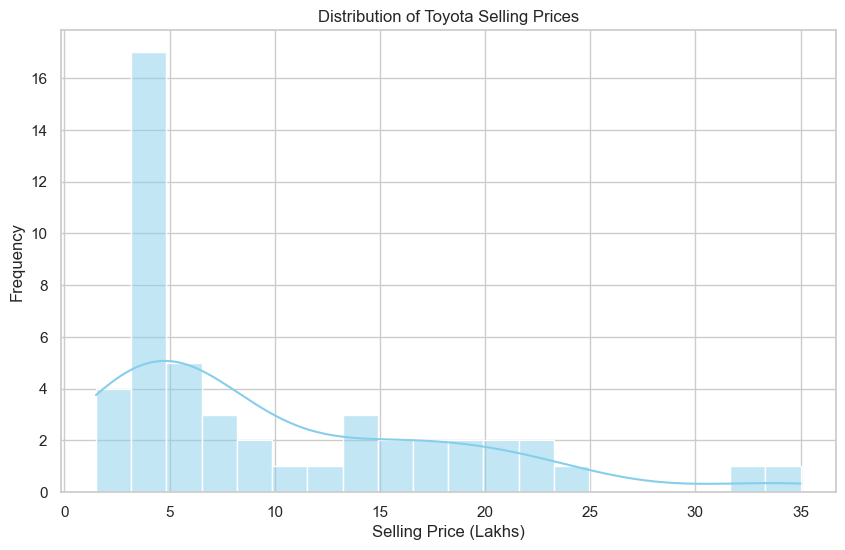

In [721]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for Toyota vehicles
toyota_prices = df31[df31['Company Name'] == 'Toyota']['Selling_Price(Lakhs)']

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(toyota_prices, bins=20, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Selling Price (Lakhs)')
plt.ylabel('Frequency')
plt.title('Distribution of Toyota Selling Prices')

# Show the plot
plt.show()


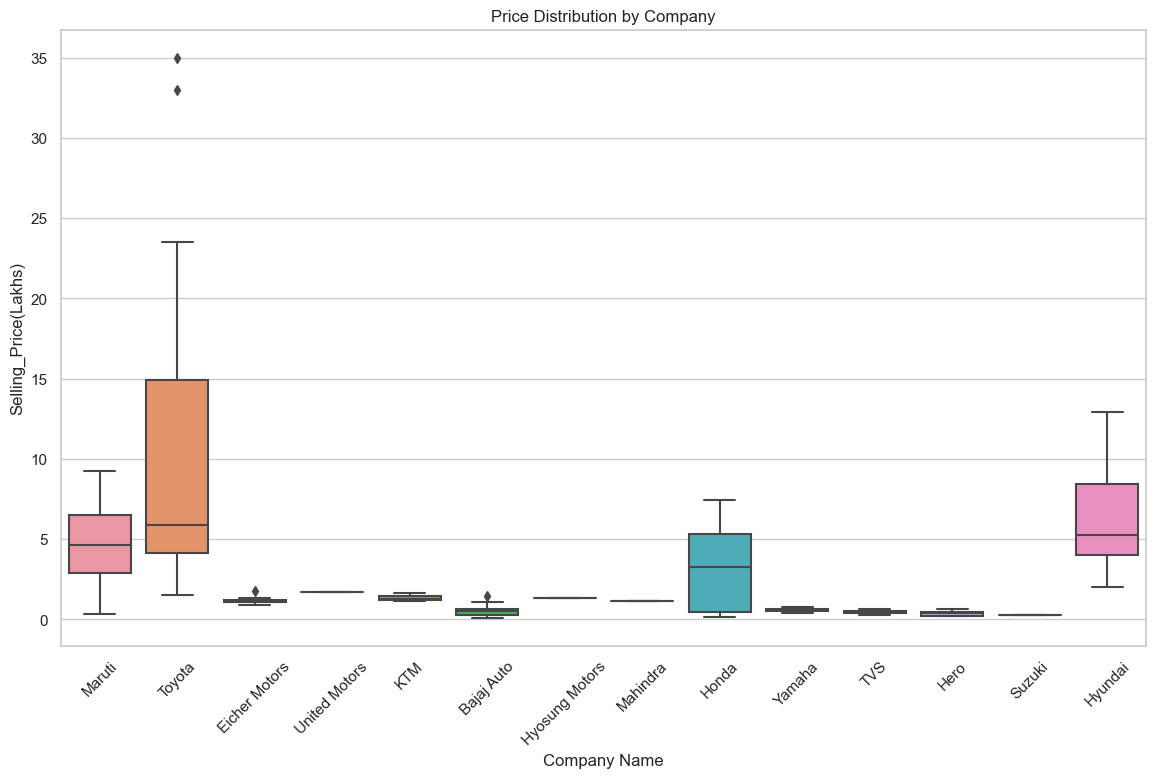

In [722]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Selling_Price(Lakhs)', data=df31)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Selling_Price(Lakhs)')
plt.show()


In [723]:
# Filter data for Toyota cars
toyota_condition = df31['Company Name'].str.contains('Toyota', case=False)
toyota_df = df31[toyota_condition]

# Check if there are Toyota cars in the DataFrame
if not toyota_df.empty:
    # Calculate IQR (Interquartile Range) for Selling_Price(Lakhs)
    q1 = toyota_df['Selling_Price(Lakhs)'].quantile(0.25)
    q3 = toyota_df['Selling_Price(Lakhs)'].quantile(0.75)
    iqr = q3 - q1

    # Set a threshold to identify outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Define the lower and upper bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Identify outliers
    outliers = toyota_df[(toyota_df['Selling_Price(Lakhs)'] < lower_bound) | (toyota_df['Selling_Price(Lakhs)'] > upper_bound)]

    # Remove outliers from the original DataFrame
    df31 = df31.drop(outliers.index)

    # Display the DataFrame after removing outliers
    print(df31)
else:
    print("No Toyota cars found in the DataFrame.")


    Vehicle_Name  Manufacturing Year  Selling_Price(Lakhs)  \
0           ritz                2014                  3.35   
1            sx4                2013                  4.75   
2           ciaz                2017                  7.25   
3        wagon r                2011                  2.85   
4          swift                2014                  4.60   
..           ...                 ...                   ...   
294         city                2016                  9.50   
295         brio                2015                  4.00   
296         city                2009                  3.35   
297         city                2017                 11.50   
298         brio                2016                  5.30   

     Present_Price(Lakhs)  Driven_kms Fuel_Type Selling_type Transmission  \
0                    5.59       27000    Petrol       Dealer       Manual   
1                    9.54       43000    Diesel       Dealer       Manual   
2                    9.8

In [724]:
df31

,Vehicle_Name,Manufacturing Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1,Car,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,1,Car,Hyundai
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,3,Car,Honda
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,3,Car,Hyundai
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,1,Car,Hyundai


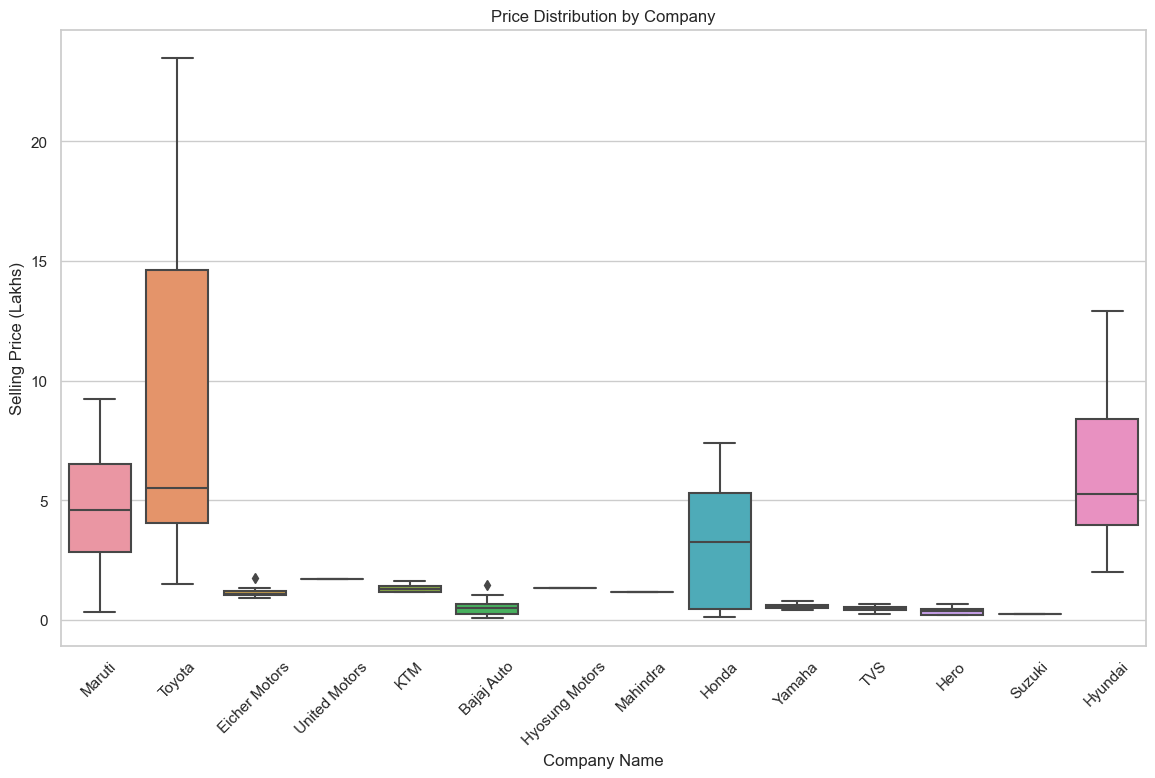

In [725]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Selling_Price(Lakhs)', data=df31)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Selling Price (Lakhs)')
plt.show()


In [726]:
# Filter data for Toyota cars
toyota_condition = df31['Company Name'].str.contains('Bajaj Auto',case=False)
toyota_df = df31[toyota_condition]

# Check if there are Toyota cars in the DataFrame
if not toyota_df.empty:
    # Calculate IQR (Interquartile Range) for Selling_Price(Lakhs)
    q1 = toyota_df['Selling_Price(Lakhs)'].quantile(0.25)
    q3 = toyota_df['Selling_Price(Lakhs)'].quantile(0.75)
    iqr = q3 - q1

    # Set a threshold to identify outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Define the lower and upper bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Identify outliers
    outliers = toyota_df[(toyota_df['Selling_Price(Lakhs)'] < lower_bound) | (toyota_df['Selling_Price(Lakhs)'] > upper_bound)]

    # Remove outliers from the original DataFrame
    df31 = df31.drop(outliers.index)

    # Display the DataFrame after removing outliers
    print(df31)
else:
    print("No Toyota cars found in the DataFrame.")


    Vehicle_Name  Manufacturing Year  Selling_Price(Lakhs)  \
0           ritz                2014                  3.35   
1            sx4                2013                  4.75   
2           ciaz                2017                  7.25   
3        wagon r                2011                  2.85   
4          swift                2014                  4.60   
..           ...                 ...                   ...   
294         city                2016                  9.50   
295         brio                2015                  4.00   
296         city                2009                  3.35   
297         city                2017                 11.50   
298         brio                2016                  5.30   

     Present_Price(Lakhs)  Driven_kms Fuel_Type Selling_type Transmission  \
0                    5.59       27000    Petrol       Dealer       Manual   
1                    9.54       43000    Diesel       Dealer       Manual   
2                    9.8

In [727]:
# Filter data for Toyota cars
toyota_condition = df31['Company Name'].str.contains('Eicher Motors', case=False)
toyota_df = df31[toyota_condition]

# Check if there are Toyota cars in the DataFrame
if not toyota_df.empty:
    # Calculate IQR (Interquartile Range) for Selling_Price(Lakhs)
    q1 = toyota_df['Selling_Price(Lakhs)'].quantile(0.25)
    q3 = toyota_df['Selling_Price(Lakhs)'].quantile(0.75)
    iqr = q3 - q1

    # Set a threshold to identify outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Define the lower and upper bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Identify outliers
    outliers = toyota_df[(toyota_df['Selling_Price(Lakhs)'] < lower_bound) | (toyota_df['Selling_Price(Lakhs)'] > upper_bound)]

    # Remove outliers from the original DataFrame
    df31 = df31.drop(outliers.index)

    # Display the DataFrame after removing outliers
    print(df31)
else:
    print("No Toyota cars found in the DataFrame.")


    Vehicle_Name  Manufacturing Year  Selling_Price(Lakhs)  \
0           ritz                2014                  3.35   
1            sx4                2013                  4.75   
2           ciaz                2017                  7.25   
3        wagon r                2011                  2.85   
4          swift                2014                  4.60   
..           ...                 ...                   ...   
294         city                2016                  9.50   
295         brio                2015                  4.00   
296         city                2009                  3.35   
297         city                2017                 11.50   
298         brio                2016                  5.30   

     Present_Price(Lakhs)  Driven_kms Fuel_Type Selling_type Transmission  \
0                    5.59       27000    Petrol       Dealer       Manual   
1                    9.54       43000    Diesel       Dealer       Manual   
2                    9.8

In [728]:
df31.isna().sum()

Vehicle_Name            0
Manufacturing Year      0
Selling_Price(Lakhs)    0
Present_Price(Lakhs)    0
Driven_kms              0
Fuel_Type               0
Selling_type            0
Transmission            0
Owner                   0
Vehicle Type            0
Company Name            0
dtype: int64

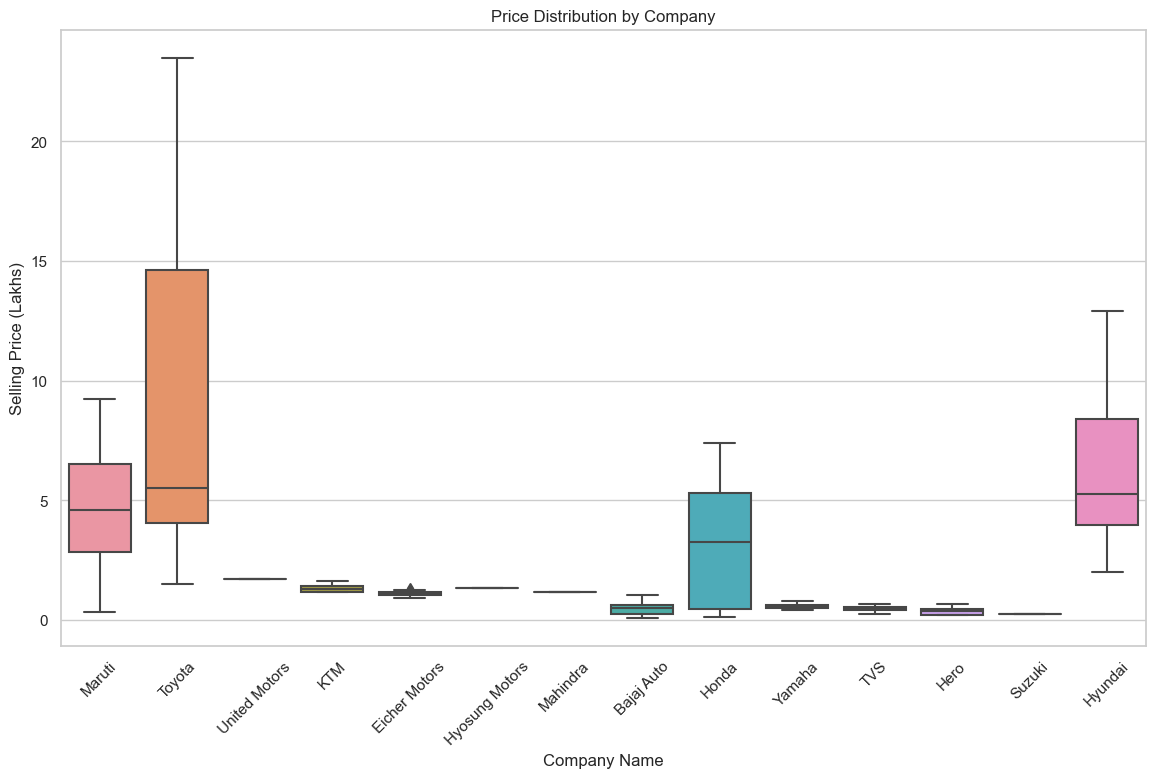

In [729]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Selling_Price(Lakhs)', data=df31)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Selling Price (Lakhs)')
plt.show()


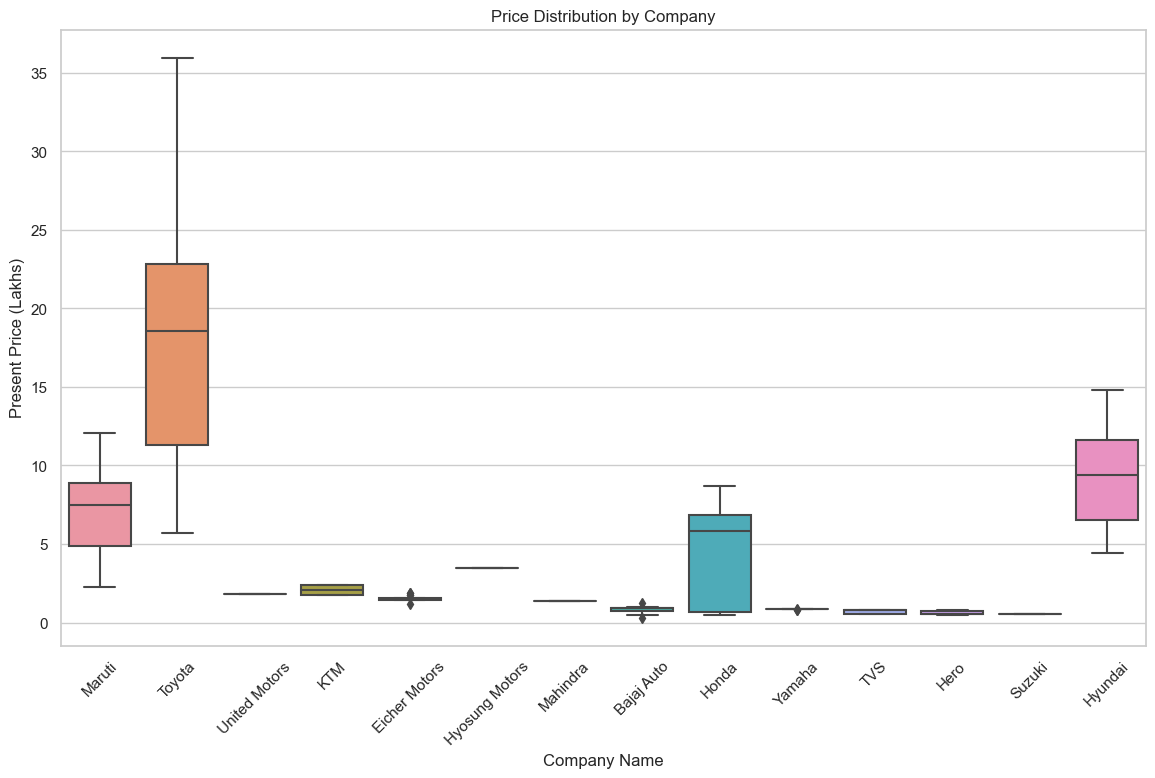

In [730]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Present_Price(Lakhs)', data=df31)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Present Price (Lakhs)')
plt.show()


In [732]:
# Filter data for Toyota cars
toyota_condition = df31['Company Name'].str.contains('Eicher Motors', case=False)
toyota_df = df31[toyota_condition]

# Check if there are Toyota cars in the DataFrame
if not toyota_df.empty:
    # Calculate IQR (Interquartile Range) for Selling_Price(Lakhs)
    q1 = toyota_df['Present_Price(Lakhs)'].quantile(0.25)
    q3 = toyota_df['Present_Price(Lakhs)'].quantile(0.75)
    iqr = q3 - q1

    # Set a threshold to identify outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Define the lower and upper bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Identify outliers
    outliers = toyota_df[(toyota_df['Present_Price(Lakhs)'] < lower_bound) | (toyota_df['Present_Price(Lakhs)'] > upper_bound)]

    # Remove outliers from the original DataFrame
    df31 = df31.drop(outliers.index)

    # Display the DataFrame after removing outliers
    print(df31)
else:
    print("No Toyota cars found in the DataFrame.")


    Vehicle_Name  Manufacturing Year  Selling_Price(Lakhs)  \
0           ritz                2014                  3.35   
1            sx4                2013                  4.75   
2           ciaz                2017                  7.25   
3        wagon r                2011                  2.85   
4          swift                2014                  4.60   
..           ...                 ...                   ...   
294         city                2016                  9.50   
295         brio                2015                  4.00   
296         city                2009                  3.35   
297         city                2017                 11.50   
298         brio                2016                  5.30   

     Present_Price(Lakhs)  Driven_kms Fuel_Type Selling_type Transmission  \
0                    5.59       27000    Petrol       Dealer       Manual   
1                    9.54       43000    Diesel       Dealer       Manual   
2                    9.8

In [733]:
# Filter data for Toyota cars
toyota_condition = df31['Company Name'].str.contains('Bajaj Auto', case=False)
toyota_df = df31[toyota_condition]

# Check if there are Toyota cars in the DataFrame
if not toyota_df.empty:
    # Calculate IQR (Interquartile Range) for Selling_Price(Lakhs)
    q1 = toyota_df['Present_Price(Lakhs)'].quantile(0.25)
    q3 = toyota_df['Present_Price(Lakhs)'].quantile(0.75)
    iqr = q3 - q1

    # Set a threshold to identify outliers (e.g., 1.5 times the IQR)
    threshold = 1.5

    # Define the lower and upper bounds
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Identify outliers
    outliers = toyota_df[(toyota_df['Present_Price(Lakhs)'] < lower_bound) | (toyota_df['Present_Price(Lakhs)'] > upper_bound)]

    # Remove outliers from the original DataFrame
    df31 = df31.drop(outliers.index)

    # Display the DataFrame after removing outliers
    print(df31)
else:
    print("No Toyota cars found in the DataFrame.")


    Vehicle_Name  Manufacturing Year  Selling_Price(Lakhs)  \
0           ritz                2014                  3.35   
1            sx4                2013                  4.75   
2           ciaz                2017                  7.25   
3        wagon r                2011                  2.85   
4          swift                2014                  4.60   
..           ...                 ...                   ...   
294         city                2016                  9.50   
295         brio                2015                  4.00   
296         city                2009                  3.35   
297         city                2017                 11.50   
298         brio                2016                  5.30   

     Present_Price(Lakhs)  Driven_kms Fuel_Type Selling_type Transmission  \
0                    5.59       27000    Petrol       Dealer       Manual   
1                    9.54       43000    Diesel       Dealer       Manual   
2                    9.8

In [734]:
df31.isna().sum()

Vehicle_Name            0
Manufacturing Year      0
Selling_Price(Lakhs)    0
Present_Price(Lakhs)    0
Driven_kms              0
Fuel_Type               0
Selling_type            0
Transmission            0
Owner                   0
Vehicle Type            0
Company Name            0
dtype: int64

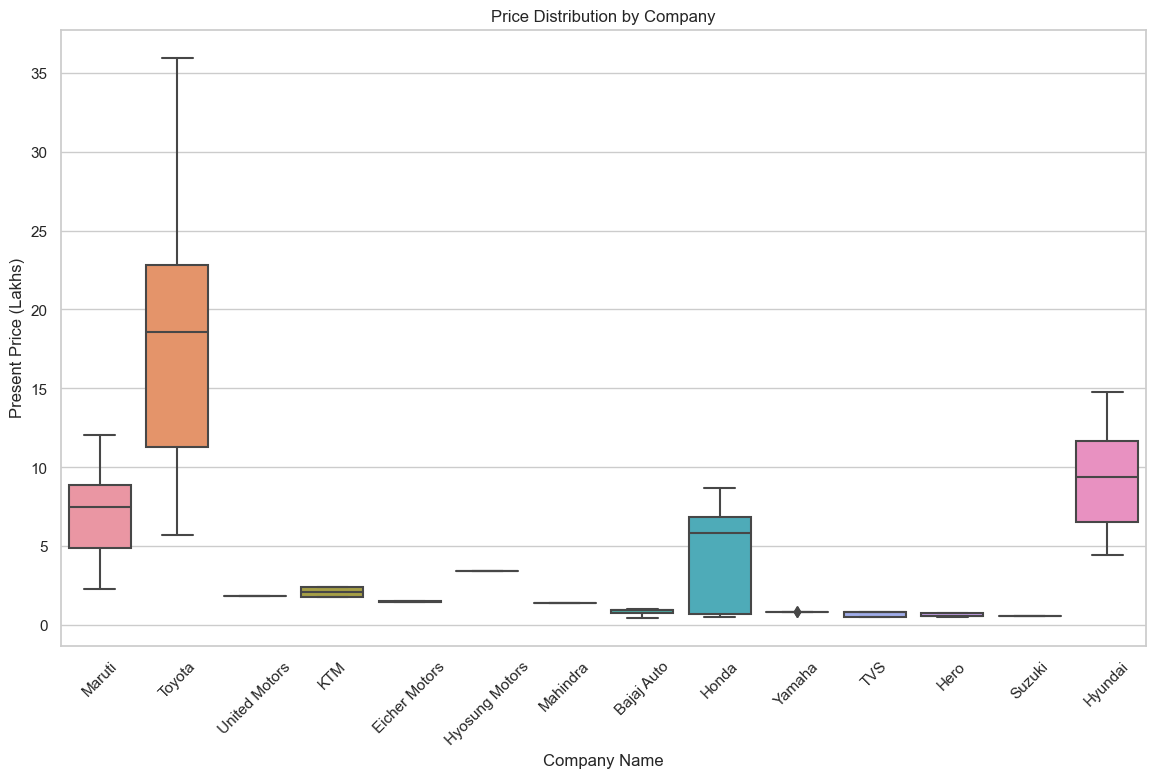

In [735]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Present_Price(Lakhs)', data=df31)
plt.xticks(rotation=45)
plt.title('Price Distribution by Company')
plt.xlabel('Company Name')
plt.ylabel('Present Price (Lakhs)')
plt.show()


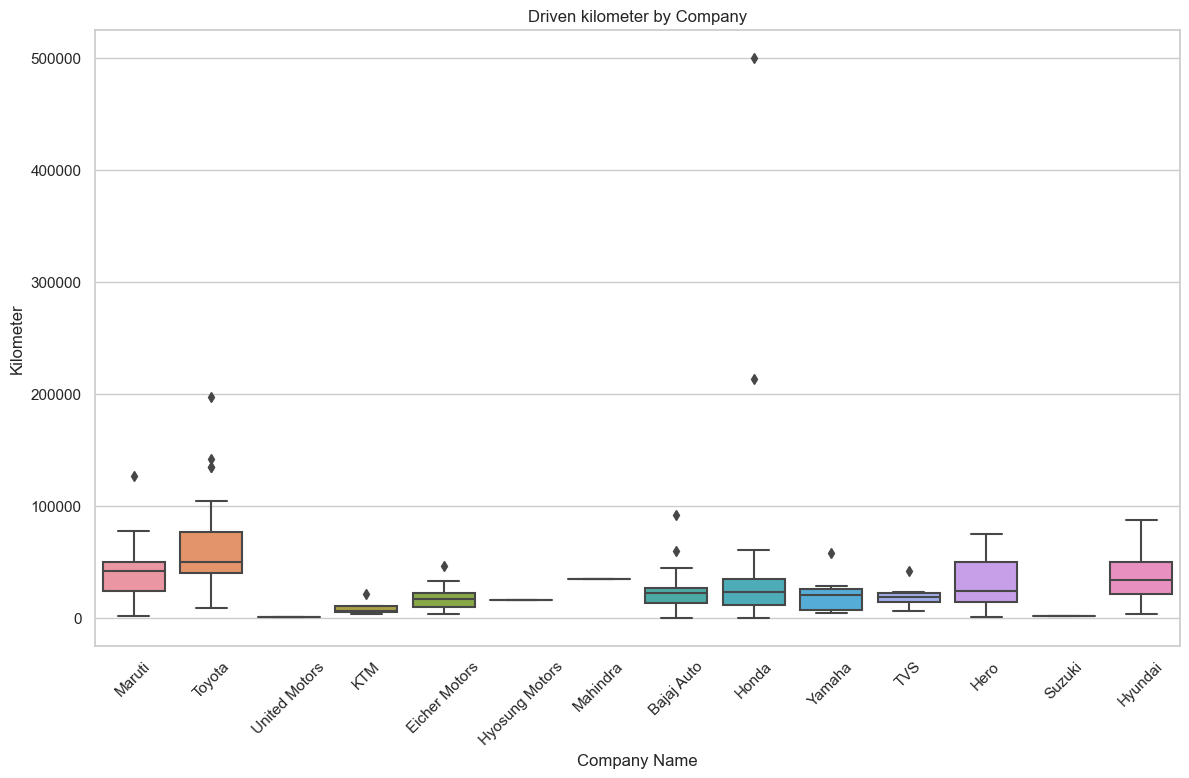

In [736]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Driven_kms', data=df31)
plt.xticks(rotation=45)
plt.title('Driven kilometer by Company')
plt.xlabel('Company Name')
plt.ylabel('Kilometer')
plt.show()


In [737]:
df31.isna().sum()

Vehicle_Name            0
Manufacturing Year      0
Selling_Price(Lakhs)    0
Present_Price(Lakhs)    0
Driven_kms              0
Fuel_Type               0
Selling_type            0
Transmission            0
Owner                   0
Vehicle Type            0
Company Name            0
dtype: int64

In [738]:
df31.max()

Vehicle_Name                 xcent
Manufacturing Year            2018
Selling_Price(Lakhs)          23.5
Present_Price(Lakhs)         35.96
Driven_kms                  500000
Fuel_Type                   Petrol
Selling_type            Individual
Transmission                Manual
Owner                            3
Vehicle Type               Scooter
Company Name                Yamaha
dtype: object

In [739]:
df32=df31.copy()

In [740]:
df32

,Vehicle_Name,Manufacturing Year,Selling_Price(Lakhs),Present_Price(Lakhs),Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Vehicle Type,Company Name
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,1,Car,Maruti
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,1,Car,Maruti
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,1,Car,Maruti
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,1,Car,Maruti
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,1,Car,Maruti
...,...,...,...,...,...,...,...,...,...,...,...
294,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,1,Car,Hyundai
295,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,3,Car,Honda
296,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,3,Car,Hyundai
297,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,1,Car,Hyundai


In [777]:
import pandas as pd

# Assuming df32 is your DataFrame

# List of companies to consider
companies_of_interest = ['Maruti', 'Toyota', 'KTM', 'Bajaj Auto', 'Honda', 'Yamaha', 'TVS']

# Function to remove outliers using IQR for a specific company
def remove_outliers_iqr(data_frame, company_name):
    # Filter DataFrame for a specific company
    company_df = data_frame[data_frame['Company Name'] == company_name]
    
    # Calculate IQR for 'Driven_kms'
    Q1 = company_df['Driven_kms'].quantile(0.25)
    Q3 = company_df['Driven_kms'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the specific company
    outliers_index = ((data_frame['Company Name'] == company_name) & 
                      ((data_frame['Driven_kms'] < lower_bound) | (data_frame['Driven_kms'] > upper_bound)))
    
    # Drop outliers from the DataFrame
    data_frame.drop(data_frame[outliers_index].index, inplace=True)
    
    return data_frame

# Loop through each company and remove outliers in df32
for company in companies_of_interest:
    df32 = remove_outliers_iqr(df32, company)

# Now, df32 contains the 'Driven_kms' column without outliers for the specified companies


In [781]:
import pandas as pd

# Assuming df32 is your DataFrame

# Function to remove outliers using IQR for a specific company
def remove_outliers_iqr(data_frame, company_name):
    # Filter DataFrame for a specific company
    company_df = data_frame[data_frame['Company Name'] == company_name]
    
    # Calculate IQR for 'Driven_kms'
    Q1 = company_df['Driven_kms'].quantile(0.25)
    Q3 = company_df['Driven_kms'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the specific company
    outliers_index = ((data_frame['Company Name'] == company_name) & 
                      ((data_frame['Driven_kms'] < lower_bound) | (data_frame['Driven_kms'] > upper_bound)))
    
    # Drop outliers from the DataFrame
    data_frame.drop(data_frame[outliers_index].index, inplace=True)
    
    return data_frame

# Remove outliers for 'Eicher Motors' in df32
df32 = remove_outliers_iqr(df32, 'Eicher Motors')

# Now, df32 contains the 'Driven_kms' column without outliers for 'Eicher Motors'


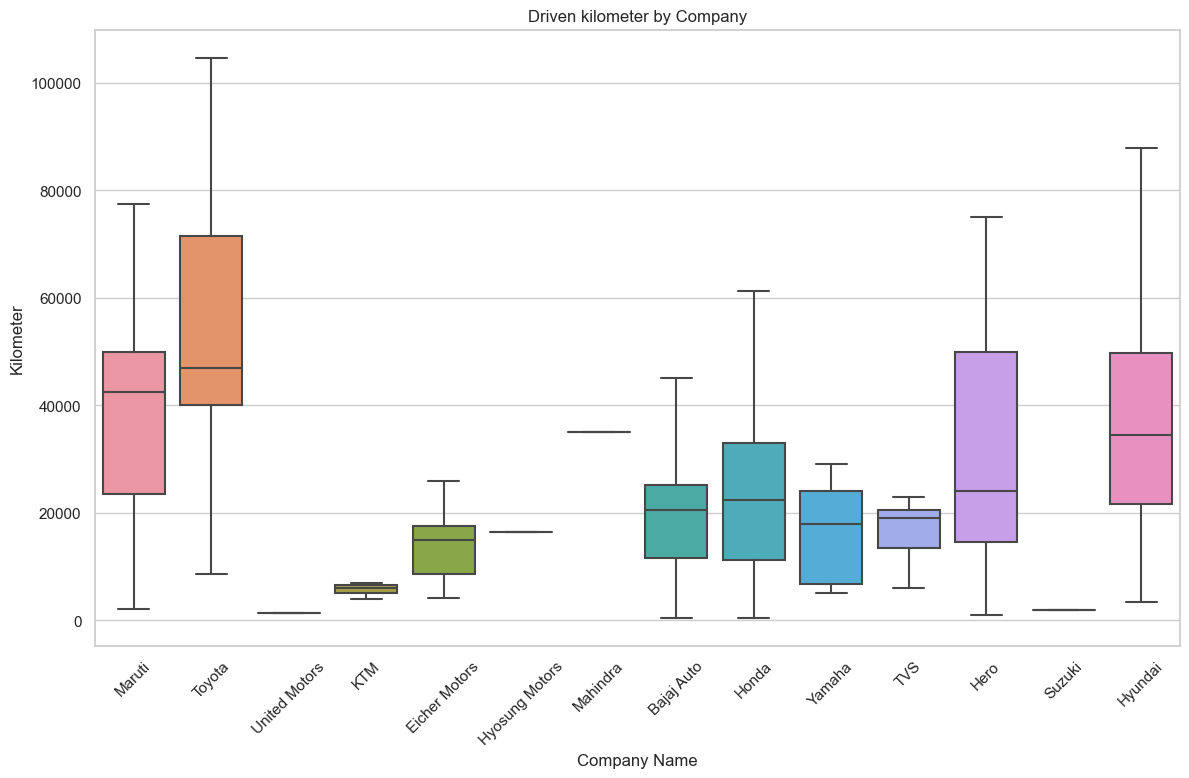

In [788]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Driven_kms', data=df32)
plt.xticks(rotation=45)
plt.title('Driven kilometer by Company')
plt.xlabel('Company Name')
plt.ylabel('Kilometer')
plt.show()


In [783]:
df35=df32.copy()

In [784]:
df35.max()

Vehicle_Name                 xcent
Company Name                Yamaha
Vehicle Type               Scooter
Fuel_Type                   Petrol
Transmission                Manual
Owner                            3
Age                             21
Present_Price(Lakhs)         35.96
Selling_Price(Lakhs)          23.5
Driven_kms                  104707
Selling_type            Individual
dtype: object

In [785]:
df35.isna().sum()

Vehicle_Name            0
Company Name            0
Vehicle Type            0
Fuel_Type               0
Transmission            0
Owner                   0
Age                     0
Present_Price(Lakhs)    0
Selling_Price(Lakhs)    0
Driven_kms              0
Selling_type            0
dtype: int64

In [289]:
df['Age'] = 2024 - df['Year']
df = df.drop('Year', axis=1)

# Display the DataFrame with the new 'Age' column
df

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


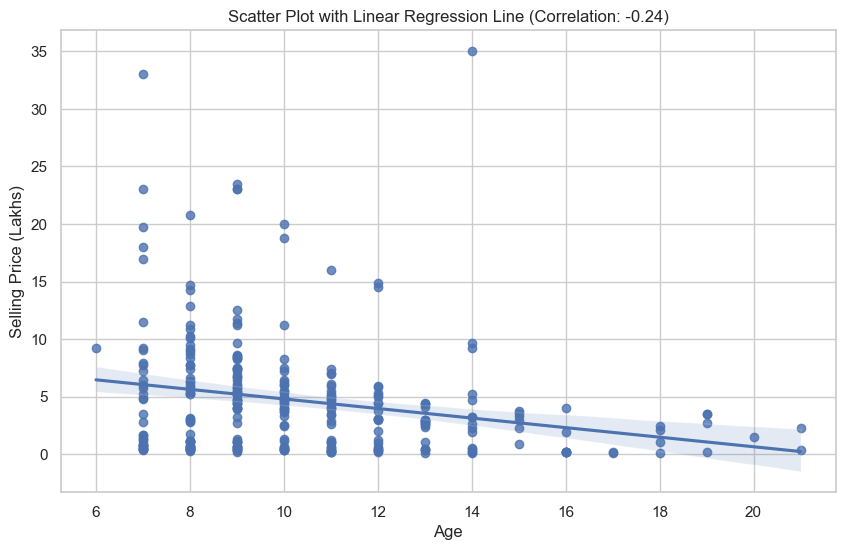

Correlation Coefficient: -0.24


In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df11 is your DataFrame
# Assuming columns 'Age' and 'Selling_Price(Lakhs)' exist

# Calculate the correlation coefficient
correlation_coefficient = df['Age'].corr(df['Selling_Price'])

# Plot the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Selling_Price', data=df)
plt.title(f'Scatter Plot with Linear Regression Line (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Age')
plt.ylabel('Selling Price (Lakhs)')
plt.grid(True)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')


In [787]:
df35

,Vehicle_Name,Company Name,Vehicle Type,Fuel_Type,Transmission,Owner,Age,Present_Price(Lakhs),Selling_Price(Lakhs),Driven_kms,Selling_type
0,ritz,Maruti,Car,Petrol,Manual,1,10,5.59,3.35,27000,Dealer
1,sx4,Maruti,Car,Diesel,Manual,1,11,9.54,4.75,43000,Dealer
2,ciaz,Maruti,Car,Petrol,Manual,1,7,9.85,7.25,6900,Dealer
3,wagon r,Maruti,Car,Petrol,Manual,1,13,4.15,2.85,5200,Dealer
4,swift,Maruti,Car,Diesel,Manual,1,10,6.87,4.60,42450,Dealer
...,...,...,...,...,...,...,...,...,...,...,...
283,city,Hyundai,Car,Diesel,Manual,1,8,11.60,9.50,33988,Dealer
284,brio,Honda,Car,Petrol,Manual,3,9,5.90,4.00,60000,Dealer
285,city,Hyundai,Car,Petrol,Manual,3,15,11.00,3.35,87934,Dealer
286,city,Hyundai,Car,Diesel,Manual,1,7,12.50,11.50,9000,Dealer


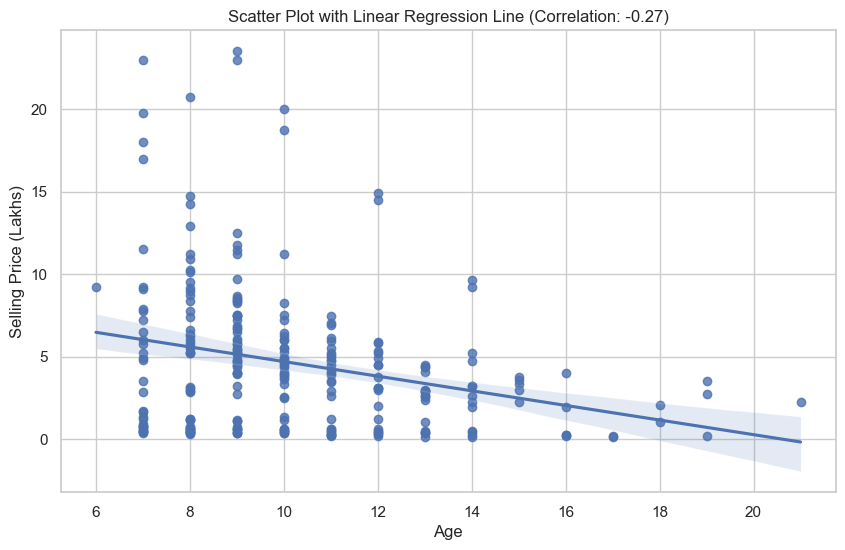

Correlation Coefficient: -0.27


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df11 is your DataFrame
# Assuming columns 'Age' and 'Selling_Price(Lakhs)' exist

# Calculate the correlation coefficient
correlation_coefficient = df35['Age'].corr(df35['Selling_Price(Lakhs)'])

# Plot the scatter plot with linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Selling_Price(Lakhs)', data=df35)
plt.title(f'Scatter Plot with Linear Regression Line (Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Age')
plt.ylabel('Selling Price (Lakhs)')
plt.grid(True)
plt.show()

# Display the correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')


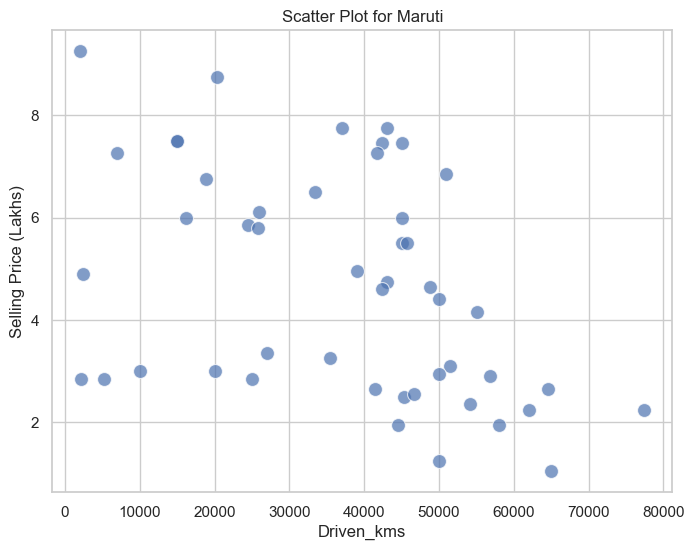

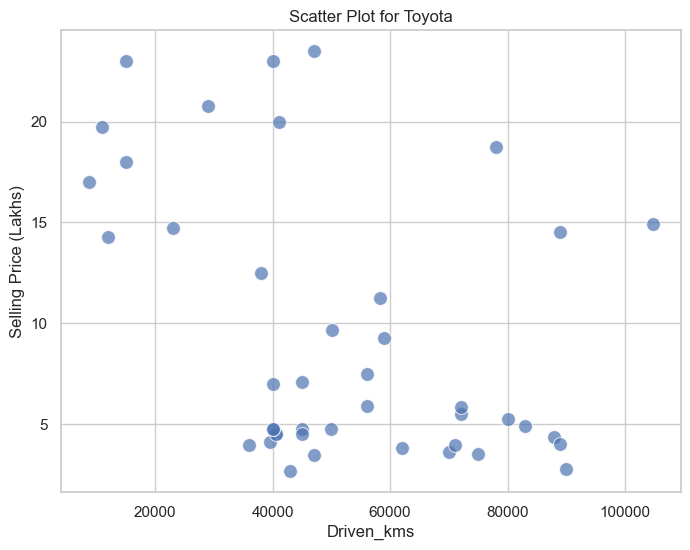

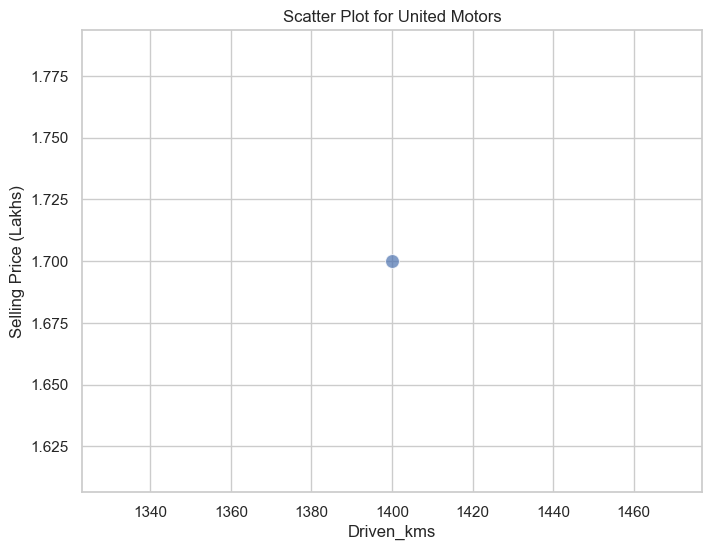

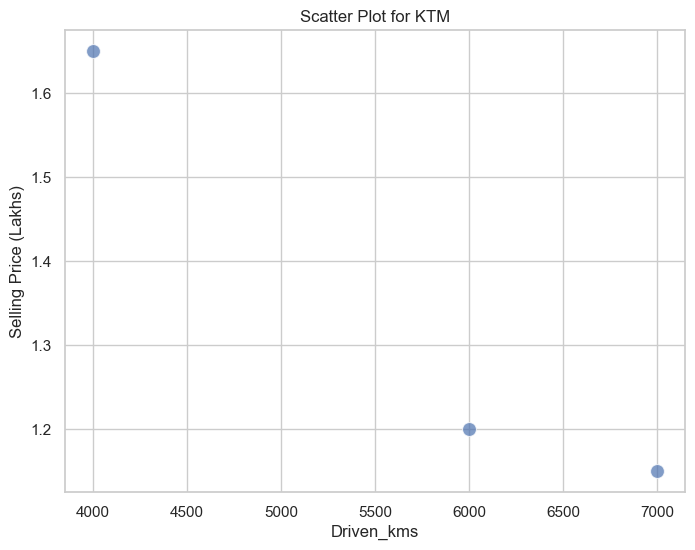

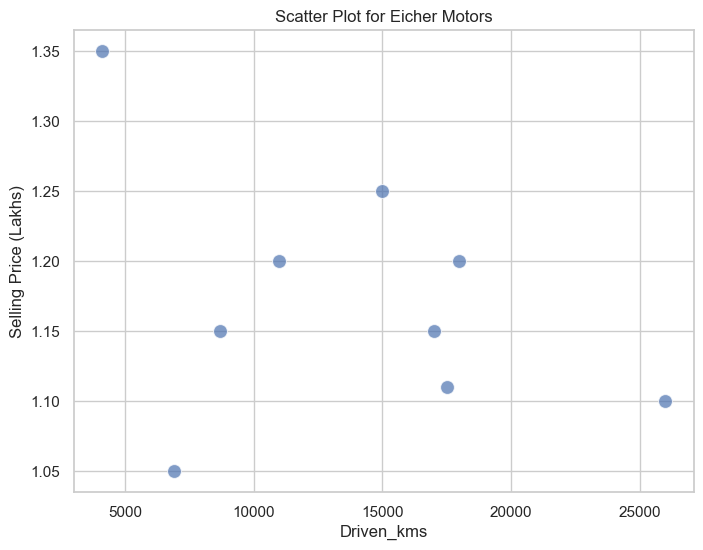

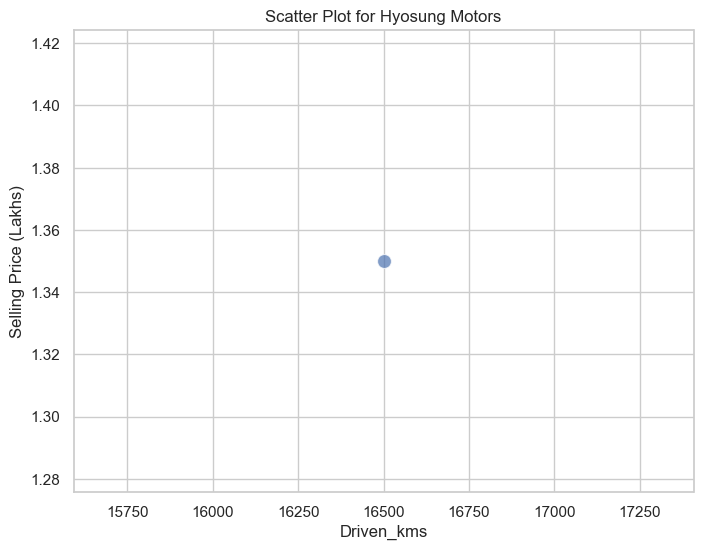

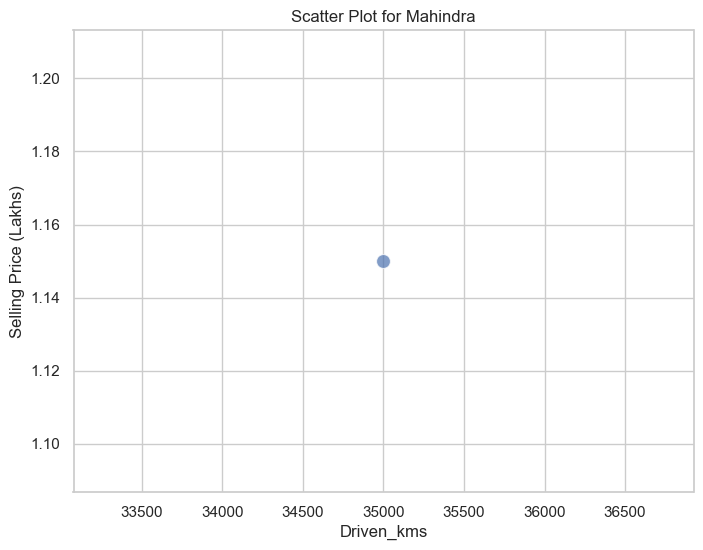

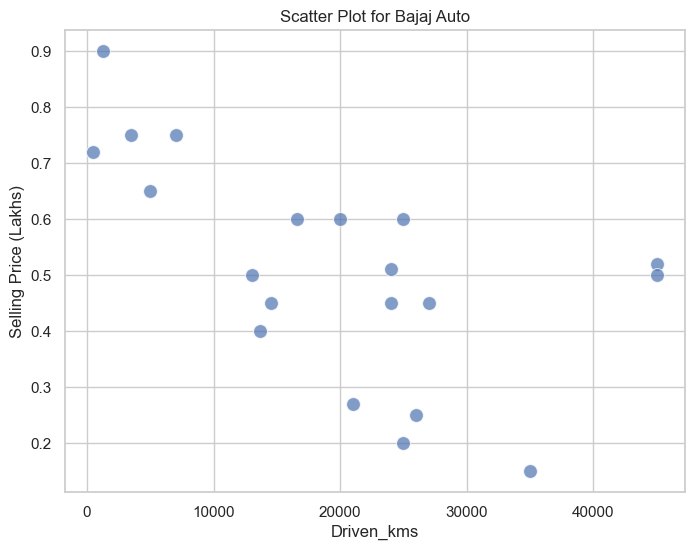

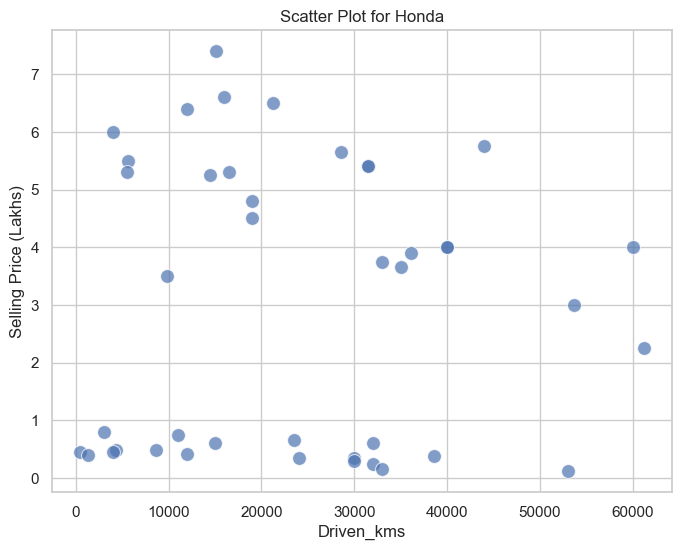

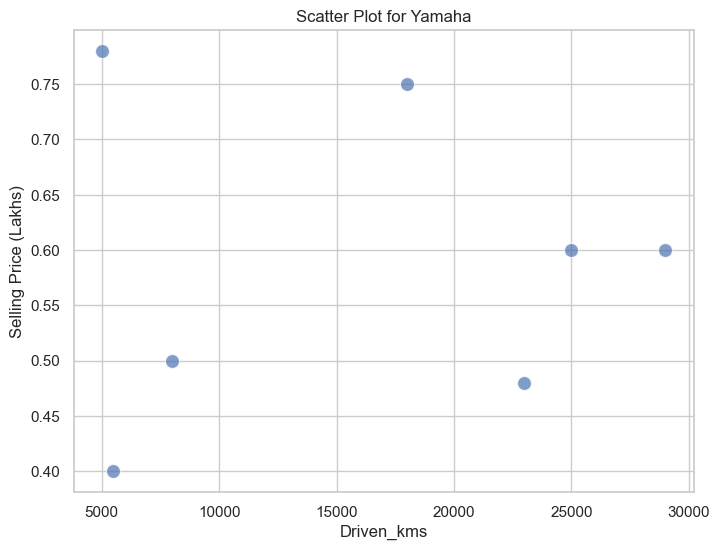

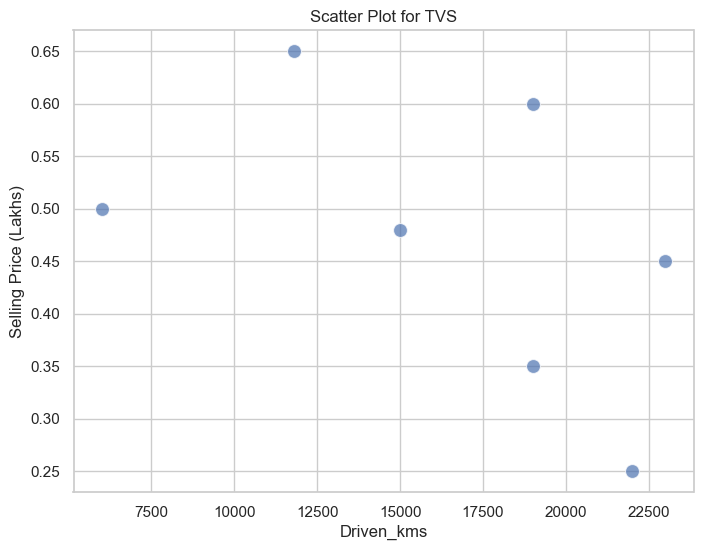

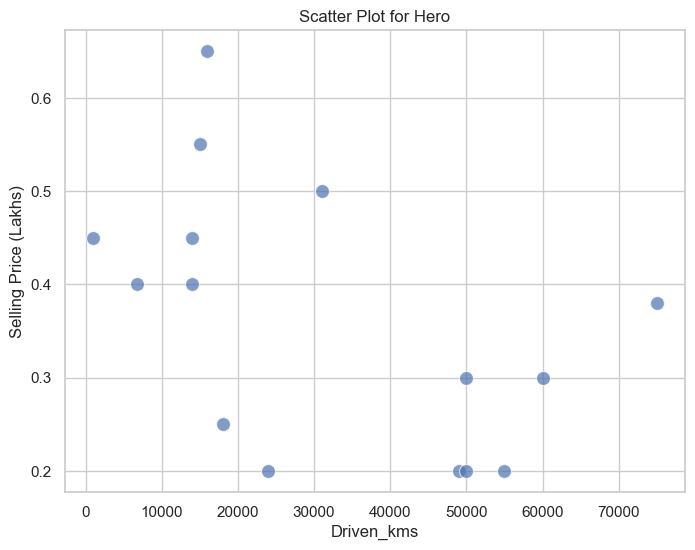

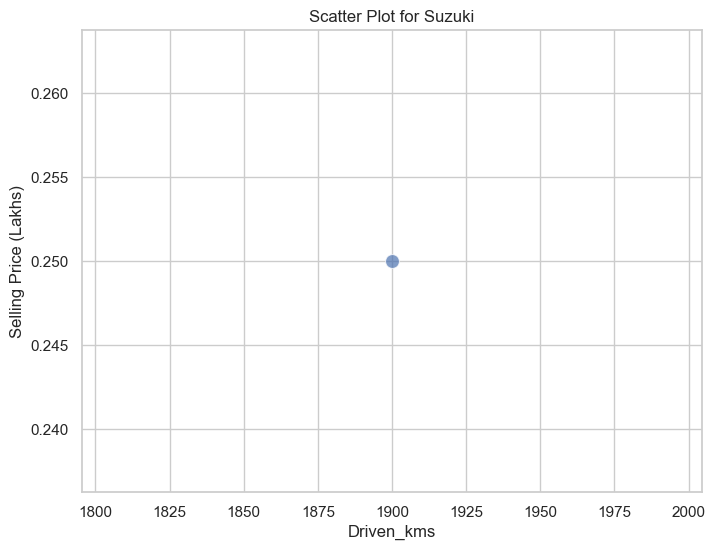

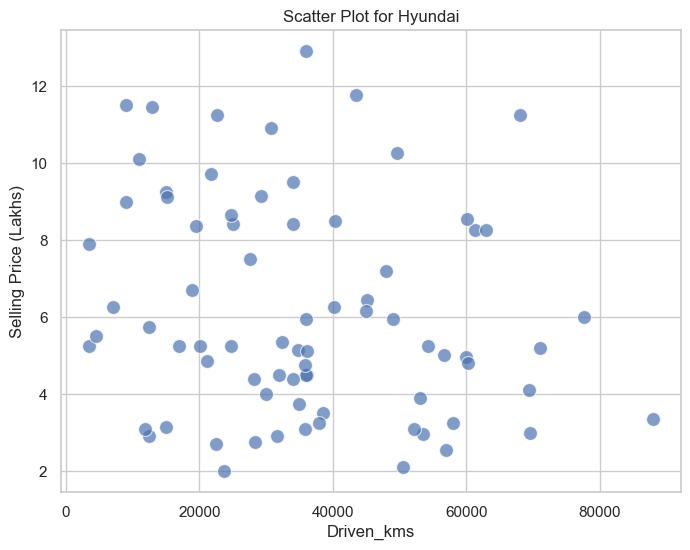

In [806]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Assuming columns 'Company Name', 'Vechicle Type', 'Selling_Price(Lakhs)', 'Driven_kms' exist

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique company names
unique_companies = df35['Company Name'].unique()

# Create a separate scatter plot for each company
for company in unique_companies:
    plt.figure(figsize=(8, 6))
    company_df = df35[df35['Company Name'] == company]
    sns.scatterplot(x='Driven_kms', y='Selling_Price(Lakhs)', data=company_df, s=100, alpha=0.7)
    plt.title(f'Scatter Plot for {company}')
    plt.xlabel('Driven_kms')
    plt.ylabel('Selling Price (Lakhs)')
    plt.show()


In [807]:
column_order = [
    'Vehicle_Name', 'Company Name', 'Vehicle Type', 'Fuel_Type', 'Transmission', 
    'Owner', 'Age', 'Present_Price(Lakhs)', 'Selling_Price(Lakhs)', 'Driven_kms', 
    'Selling_type'
]

# Set the new order of columns
df35 = df35[column_order]
df35 = df35.reset_index(drop=True)
df35

,Vehicle_Name,Company Name,Vehicle Type,Fuel_Type,Transmission,Owner,Age,Present_Price(Lakhs),Selling_Price(Lakhs),Driven_kms,Selling_type
0,ritz,Maruti,Car,Petrol,Manual,1,10,5.59,3.35,27000,Dealer
1,sx4,Maruti,Car,Diesel,Manual,1,11,9.54,4.75,43000,Dealer
2,ciaz,Maruti,Car,Petrol,Manual,1,7,9.85,7.25,6900,Dealer
3,wagon r,Maruti,Car,Petrol,Manual,1,13,4.15,2.85,5200,Dealer
4,swift,Maruti,Car,Diesel,Manual,1,10,6.87,4.60,42450,Dealer
...,...,...,...,...,...,...,...,...,...,...,...
269,city,Hyundai,Car,Diesel,Manual,1,8,11.60,9.50,33988,Dealer
270,brio,Honda,Car,Petrol,Manual,3,9,5.90,4.00,60000,Dealer
271,city,Hyundai,Car,Petrol,Manual,3,15,11.00,3.35,87934,Dealer
272,city,Hyundai,Car,Diesel,Manual,1,7,12.50,11.50,9000,Dealer


In [808]:
df35.isna().sum()

Vehicle_Name            0
Company Name            0
Vehicle Type            0
Fuel_Type               0
Transmission            0
Owner                   0
Age                     0
Present_Price(Lakhs)    0
Selling_Price(Lakhs)    0
Driven_kms              0
Selling_type            0
dtype: int64

In [809]:
df40=df35.copy()

In [810]:
df40

,Vehicle_Name,Company Name,Vehicle Type,Fuel_Type,Transmission,Owner,Age,Present_Price(Lakhs),Selling_Price(Lakhs),Driven_kms,Selling_type
0,ritz,Maruti,Car,Petrol,Manual,1,10,5.59,3.35,27000,Dealer
1,sx4,Maruti,Car,Diesel,Manual,1,11,9.54,4.75,43000,Dealer
2,ciaz,Maruti,Car,Petrol,Manual,1,7,9.85,7.25,6900,Dealer
3,wagon r,Maruti,Car,Petrol,Manual,1,13,4.15,2.85,5200,Dealer
4,swift,Maruti,Car,Diesel,Manual,1,10,6.87,4.60,42450,Dealer
...,...,...,...,...,...,...,...,...,...,...,...
269,city,Hyundai,Car,Diesel,Manual,1,8,11.60,9.50,33988,Dealer
270,brio,Honda,Car,Petrol,Manual,3,9,5.90,4.00,60000,Dealer
271,city,Hyundai,Car,Petrol,Manual,3,15,11.00,3.35,87934,Dealer
272,city,Hyundai,Car,Diesel,Manual,1,7,12.50,11.50,9000,Dealer


In [811]:
df40.isna().sum()

Vehicle_Name            0
Company Name            0
Vehicle Type            0
Fuel_Type               0
Transmission            0
Owner                   0
Age                     0
Present_Price(Lakhs)    0
Selling_Price(Lakhs)    0
Driven_kms              0
Selling_type            0
dtype: int64

# Data Visualization

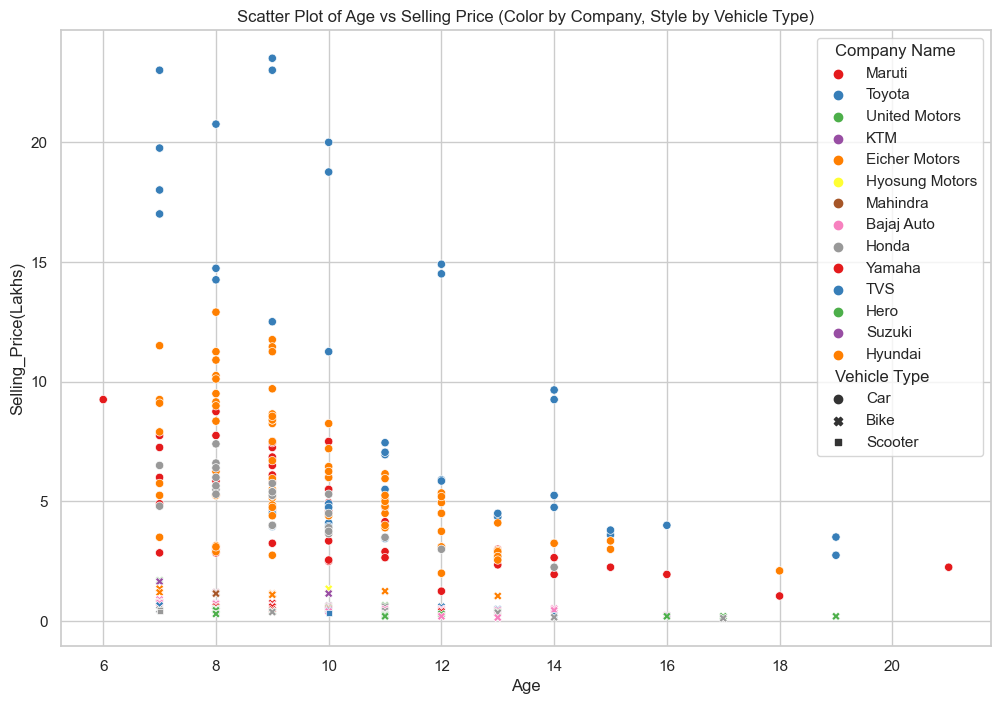

In [812]:
# Assuming you have a column 'Vehicle Type' that specifies the type of vehicle
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df40, x='Age', y='Selling_Price(Lakhs)', hue='Company Name', style='Vehicle Type', palette='Set1')
plt.title('Scatter Plot of Age vs Selling Price (Color by Company, Style by Vehicle Type)')
plt.show()


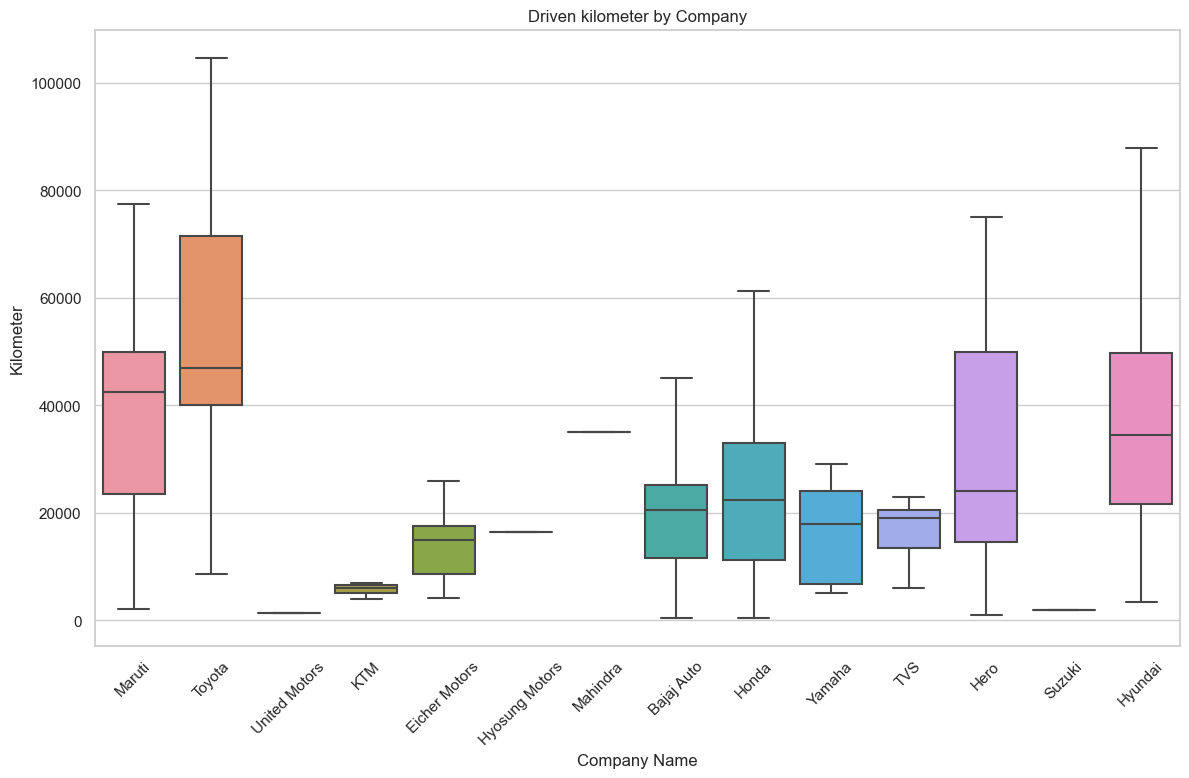

In [813]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Company Name', y='Driven_kms', data=df40)
plt.xticks(rotation=45)
plt.title('Driven kilometer by Company')
plt.xlabel('Company Name')
plt.ylabel('Kilometer')
plt.show()


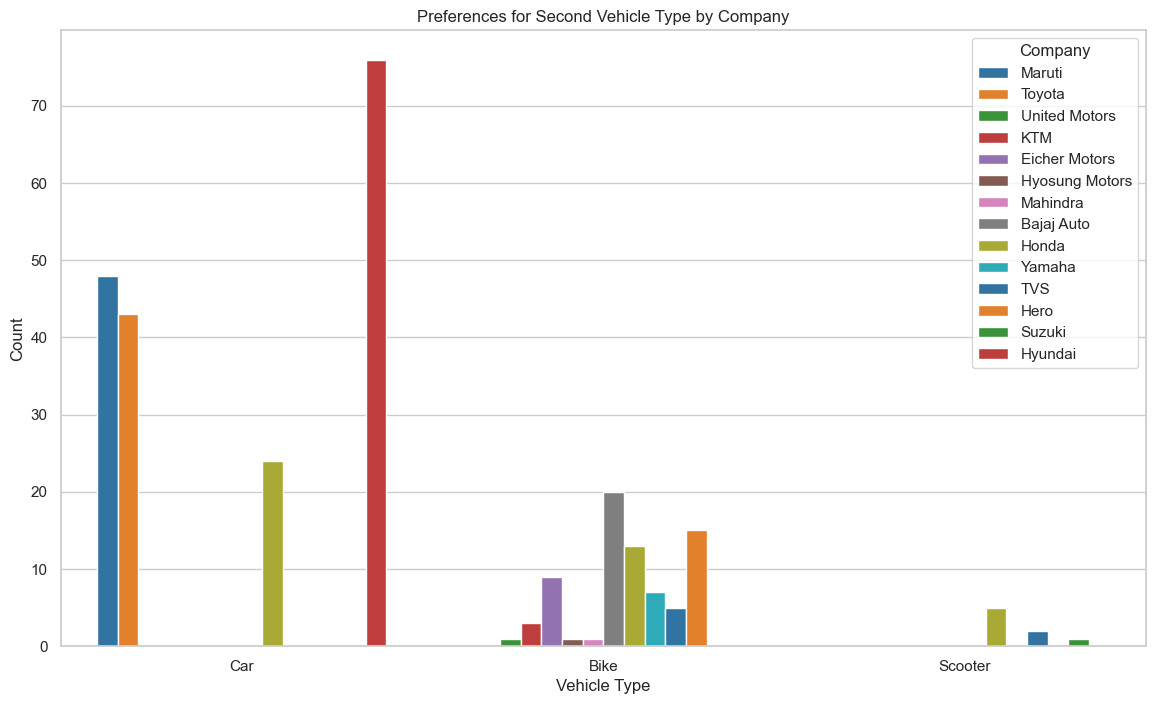

In [814]:
import matplotlib.pyplot as plt
import seaborn as sns

# Custom color palette with distinct colors
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(14, 8))
sns.countplot(data=df40, x='Vehicle Type', hue='Company Name', palette=custom_palette)
plt.title('Preferences for Second Vehicle Type by Company')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.legend(title='Company', bbox_to_anchor=(1, 1))
plt.show()


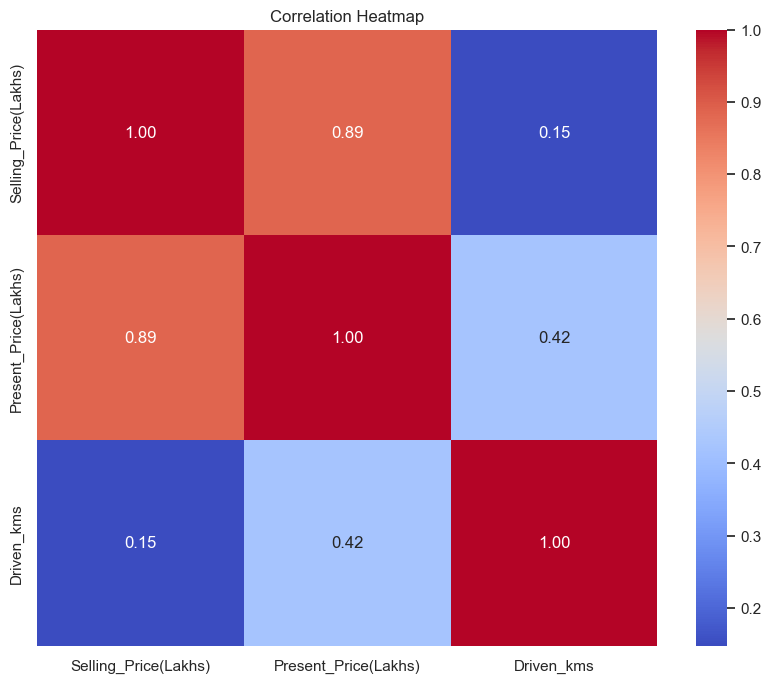

In [815]:
plt.figure(figsize=(10, 8))
correlation_matrix = df40[['Selling_Price(Lakhs)', 'Present_Price(Lakhs)', 'Driven_kms']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


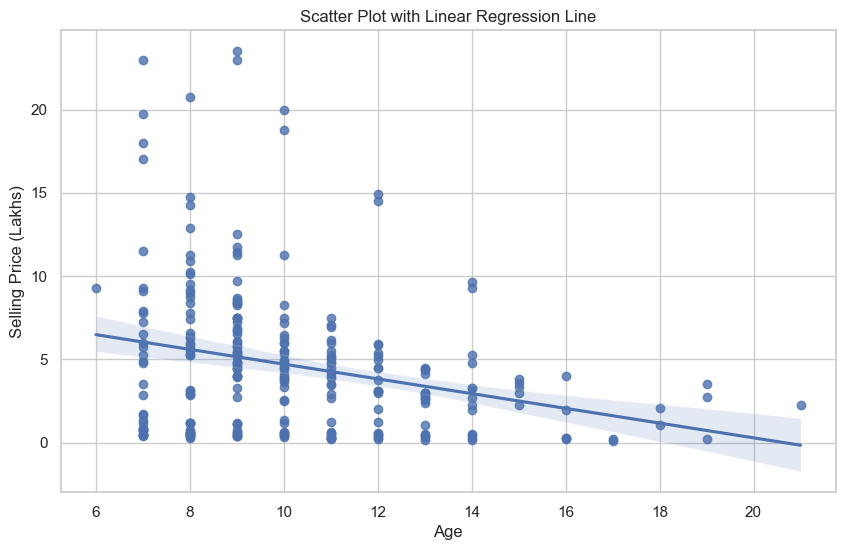

In [816]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df11 is your DataFrame
# Assuming columns 'Age' and 'Selling_Price(Lakhs)' exist

plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Selling_Price(Lakhs)', data=df40)
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Age')
plt.ylabel('Selling Price (Lakhs)')
plt.grid(True)
plt.show()


In [185]:
pip install wordcloud


     ------------------------------------ 300.0/300.0 kB 109.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


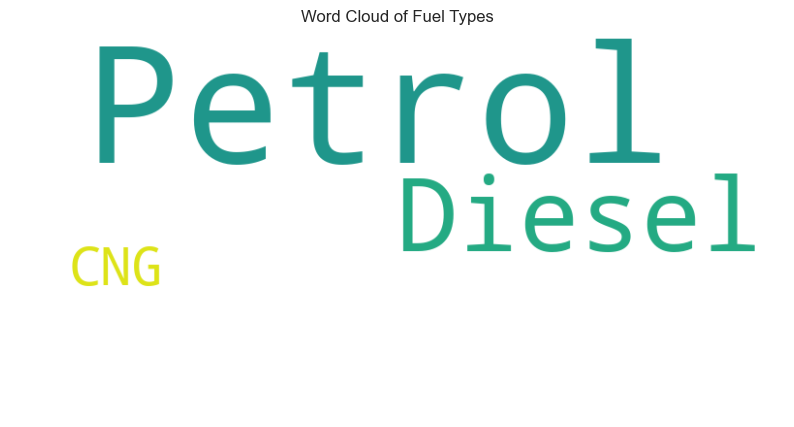

In [210]:
from wordcloud import WordCloud

fuel_types = ' '.join(df9['Fuel_Type'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fuel_types)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fuel Types')
plt.show()


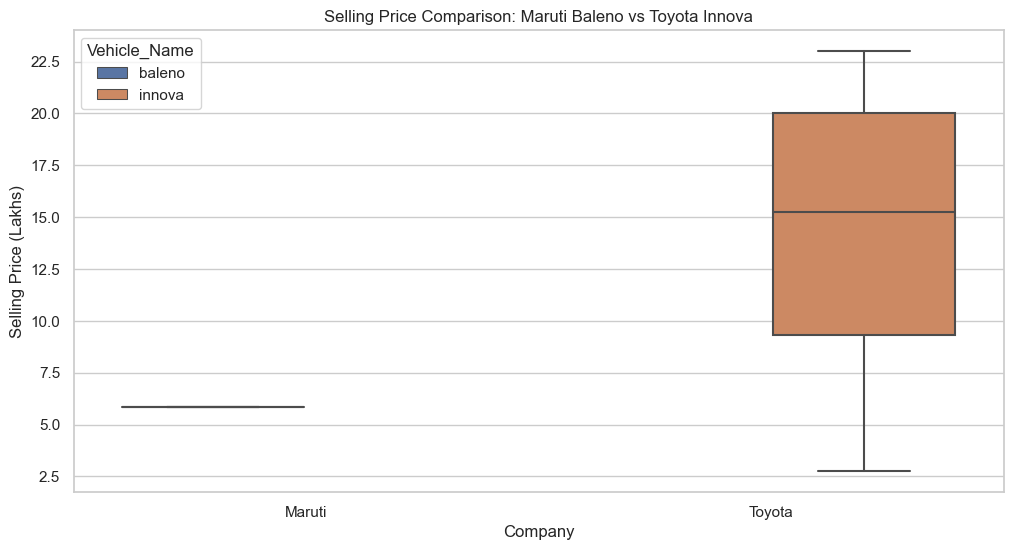

C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

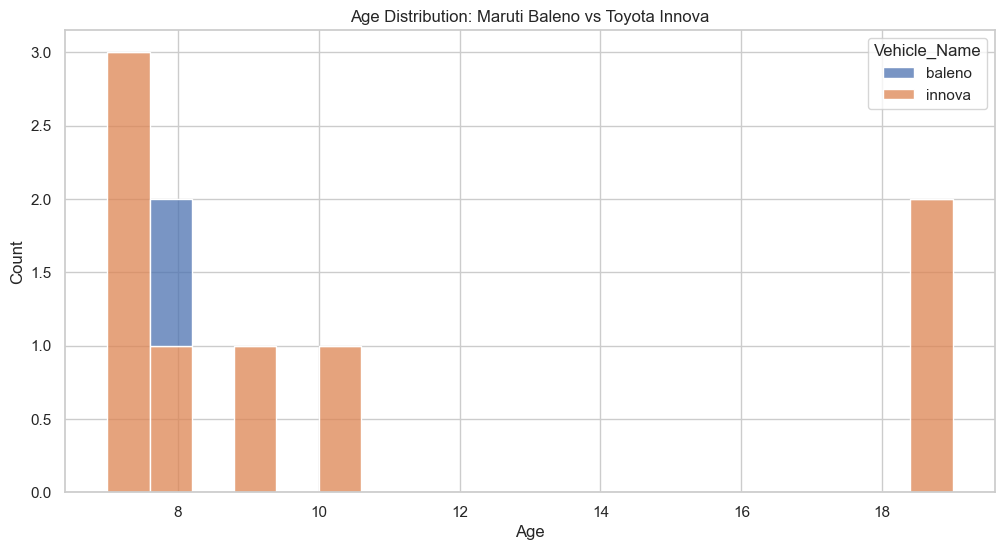

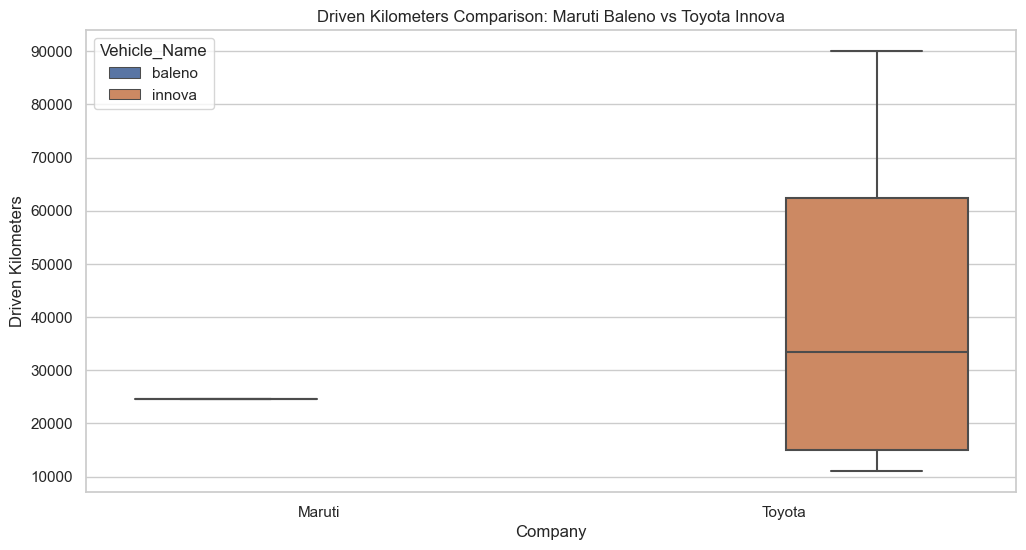

In [817]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df8 is your DataFrame
# Assuming the 'Vehicle_Name' column contains the vehicle names

# Extract data for Maruti Baleno and Toyota Innova
maruti_baleno_data = df40[df40['Vehicle_Name'].str.lower() == 'baleno']
toyota_innova_data = df40[df40['Vehicle_Name'].str.lower() == 'innova']

# Visualization for Selling Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Selling_Price(Lakhs)', data=pd.concat([maruti_baleno_data, toyota_innova_data]), hue='Vehicle_Name')
plt.title('Selling Price Comparison: Maruti Baleno vs Toyota Innova')
plt.xlabel('Company')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

# Visualization for Manufacturing Year
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=pd.concat([maruti_baleno_data, toyota_innova_data]), hue='Vehicle_Name', bins=20, multiple='stack')
plt.title('Age Distribution: Maruti Baleno vs Toyota Innova')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualization for Driven Kilometers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Driven_kms', data=pd.concat([maruti_baleno_data, toyota_innova_data]), hue='Vehicle_Name')
plt.title('Driven Kilometers Comparison: Maruti Baleno vs Toyota Innova')
plt.xlabel('Company')
plt.ylabel('Driven Kilometers')
plt.show()


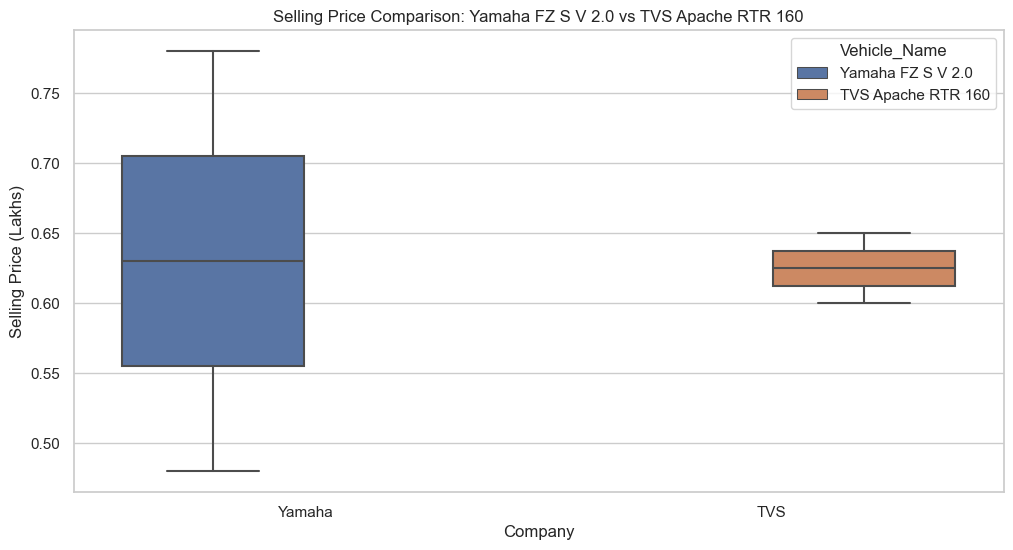

C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Pujan\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

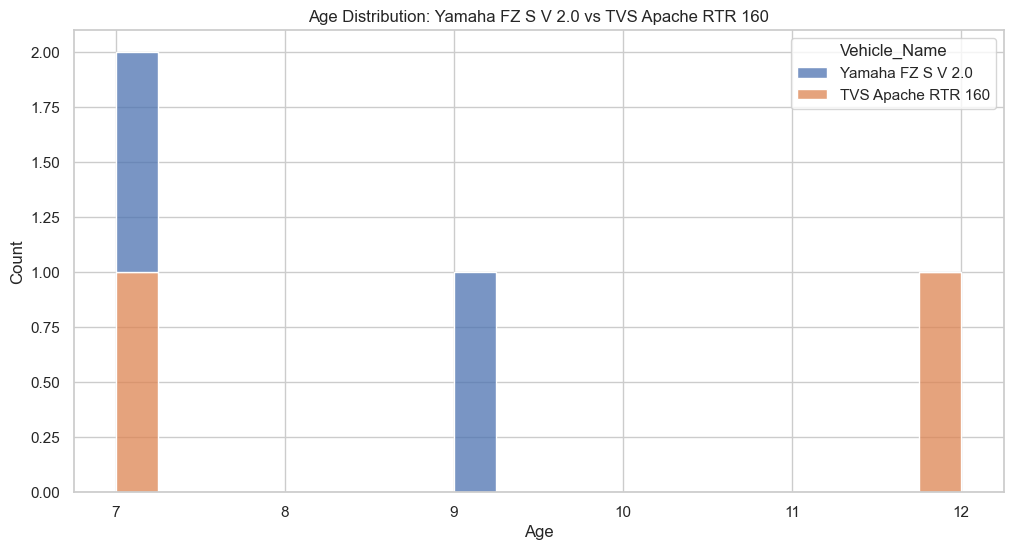

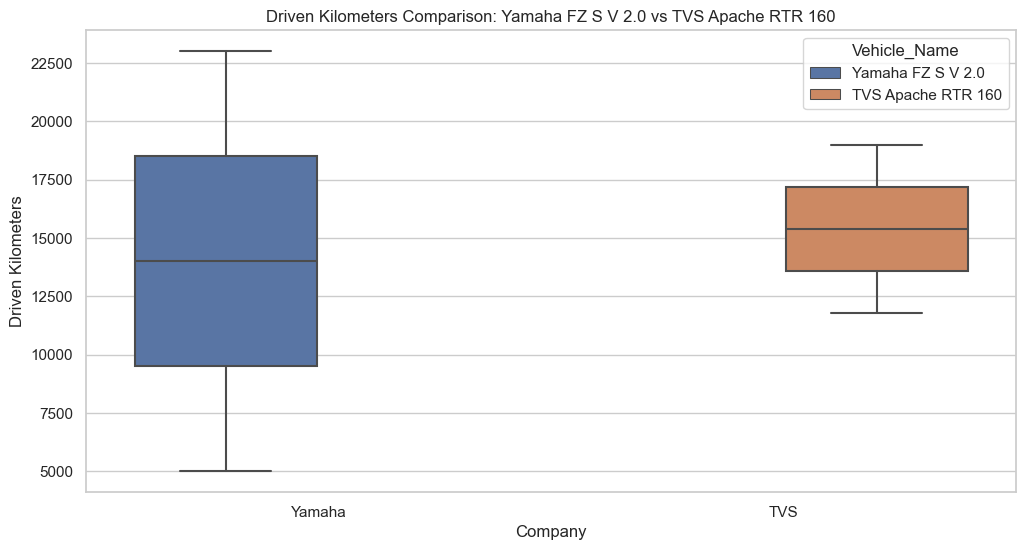

In [818]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df8 is your DataFrame
# Assuming the 'Vehicle_Name' column contains the vehicle names

# Extract data for Yamaha FZ S V 2.0 and TVS Apache RTR 160
yamaha_data = df40[df40['Vehicle_Name'].str.lower() == 'yamaha fz s v 2.0']
tvs_data = df40[df40['Vehicle_Name'].str.lower() == 'tvs apache rtr 160']

# Visualization for Selling Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Selling_Price(Lakhs)', data=pd.concat([yamaha_data, tvs_data]), hue='Vehicle_Name')
plt.title('Selling Price Comparison: Yamaha FZ S V 2.0 vs TVS Apache RTR 160')
plt.xlabel('Company')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

# Visualization for Manufacturing Year
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', data=pd.concat([yamaha_data, tvs_data]), hue='Vehicle_Name', bins=20, multiple='stack')
plt.title('Age Distribution: Yamaha FZ S V 2.0 vs TVS Apache RTR 160')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualization for Driven Kilometers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company Name', y='Driven_kms', data=pd.concat([yamaha_data, tvs_data]), hue='Vehicle_Name')
plt.title('Driven Kilometers Comparison: Yamaha FZ S V 2.0 vs TVS Apache RTR 160')
plt.xlabel('Company')
plt.ylabel('Driven Kilometers')
plt.show()


In [821]:
df40.isna().sum()

Vehicle_Name            0
Company Name            0
Vehicle Type            0
Fuel_Type               0
Transmission            0
Owner                   0
Age                     0
Present_Price(Lakhs)    0
Selling_Price(Lakhs)    0
Driven_kms              0
Selling_type            0
dtype: int64

## 3.2.2 Build Primary Model

In [822]:
df41=df40.copy()

In [823]:
df41.head()

,Vehicle_Name,Company Name,Vehicle Type,Fuel_Type,Transmission,Owner,Age,Present_Price(Lakhs),Selling_Price(Lakhs),Driven_kms,Selling_type
0,ritz,Maruti,Car,Petrol,Manual,1,10,5.59,3.35,27000,Dealer
1,sx4,Maruti,Car,Diesel,Manual,1,11,9.54,4.75,43000,Dealer
2,ciaz,Maruti,Car,Petrol,Manual,1,7,9.85,7.25,6900,Dealer
3,wagon r,Maruti,Car,Petrol,Manual,1,13,4.15,2.85,5200,Dealer
4,swift,Maruti,Car,Diesel,Manual,1,10,6.87,4.60,42450,Dealer


In [824]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
fuel_encoder = LabelEncoder()
selling_type_encoder = LabelEncoder()
transmission_encoder = LabelEncoder()
vehicle_type_encoder = LabelEncoder()

# Encoding the Fuel_Type values
df41['Fuel_Type'] = fuel_encoder.fit_transform(df41['Fuel_Type'])

# Encoding the Selling_type values
df41['Selling_type'] = selling_type_encoder.fit_transform(df41['Selling_type'])

# Encoding the Transmission values
df41['Transmission'] = transmission_encoder.fit_transform(df41['Transmission'])

# Encoding the Vehicle Type values
df41['Vehicle Type'] = vehicle_type_encoder.fit_transform(df41['Vehicle Type'])

df41['Company Name'] = vehicle_type_encoder.fit_transform(df41['Company Name'])


In [825]:
df41.isna().sum()

Vehicle_Name            0
Company Name            0
Vehicle Type            0
Fuel_Type               0
Transmission            0
Owner                   0
Age                     0
Present_Price(Lakhs)    0
Selling_Price(Lakhs)    0
Driven_kms              0
Selling_type            0
dtype: int64

In [826]:
df41

,Vehicle_Name,Company Name,Vehicle Type,Fuel_Type,Transmission,Owner,Age,Present_Price(Lakhs),Selling_Price(Lakhs),Driven_kms,Selling_type
0,ritz,8,1,2,1,1,10,5.59,3.35,27000,0
1,sx4,8,1,1,1,1,11,9.54,4.75,43000,0
2,ciaz,8,1,2,1,1,7,9.85,7.25,6900,0
3,wagon r,8,1,2,1,1,13,4.15,2.85,5200,0
4,swift,8,1,1,1,1,10,6.87,4.60,42450,0
...,...,...,...,...,...,...,...,...,...,...,...
269,city,5,1,1,1,1,8,11.60,9.50,33988,0
270,brio,3,1,2,1,3,9,5.90,4.00,60000,0
271,city,5,1,2,1,3,15,11.00,3.35,87934,0
272,city,5,1,1,1,1,7,12.50,11.50,9000,0


**Vechicle Type** 

- 0 = Bike

- 1 = Car

- 2 = Scooter

**Fuel Type**

- 0 = CNG

- 1 = Diesel

- 2 = Petrol


**Transmission**

- 0 = Automatic

- 1 = Manual


**Selling Type**

- 0 = Dealer

- 1 = Individual 


**Company Name**

- 0 = Bajaj
- 1 = Eicher Motors
- 2 = Hero
- 3 = Honda
- 4 = Hyosung
- 5 = Hyundai
- 6 = KTM
- 7 = Mahindra
- 8 = Maruti
- 9 = Suzuki
- 10 = TVS
- 11 = Toyota
- 12 = United Motors
- 13 = Yamaha

In [1041]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
# Select features and target variable
x2 = df41[['Company Name','Vehicle Type','Fuel_Type','Transmission','Age','Present_Price(Lakhs)','Driven_kms','Owner' ]]
y2 = df41['Selling_Price(Lakhs)']

# Data preprocessing
# - Handle missing values if any
# - Handle categorical variables if any


# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Train a linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(x2_train, y2_train)

# Make predictions
y_pred = model_LinearRegression.predict(x2_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y2_test, y_pred)

# Display evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.9755577484176948
Mean Squared Error: 2.008741168588261
R-squared: 0.8875629404667932


In [1053]:
model_LinearRegression.predict([[2,0,1,0,5,20.0,400000,0]])

C:\Users\Pujan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09727295])

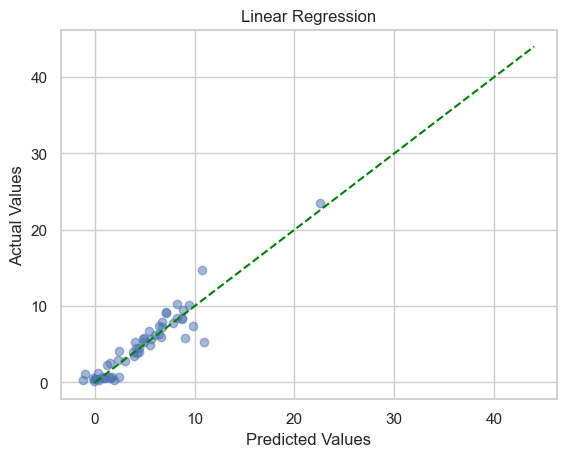

In [1054]:
plt.scatter(y_pred, y2_test, alpha=0.5)
plt.plot(np.arange(0, 45), np.arange(0, 45), color='green', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [833]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

def gradient_descent(X, y):
    m_curr = np.zeros(X.shape[1])
    b_curr = 0
    iterations = 1000
    n = len(X)
    learning_rate = 0.01

    cost_previous = 0

    for i in range(iterations):
        y_predicted = X @ m_curr + b_curr
        cost = (1/n) * sum((y - y_predicted)**2)
        md = -(2/n) * X.T @ (y - y_predicted)
        bd = -(2/n) * sum(y - y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print("Iteration {}: Cost {}".format(i, cost))

    return m_curr, b_curr

if __name__ == "__main__":
    # Assuming df13 is your DataFrame
    x1 = df41[['Company Name','Vehicle Type', 'Fuel_Type', 'Transmission', 'Age', 'Present_Price(Lakhs)', 'Driven_kms']]
    y1 = df41['Selling_Price(Lakhs)']

    # Data preprocessing
    # - Handle missing values if any
    # - Handle categorical variables if any

    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(x1)

    # Add a column of ones for the intercept term
    X = np.column_stack((np.ones(len(X)), X))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

    # Train a linear regression model using gradient descent
    m, b = gradient_descent(X_train, y_train)

    # Make predictions on the test set
    y_pred = X_test @ m + b

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display evaluation metrics
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')


Iteration 0: Cost 40.22895890410961
Iteration 1: Cost 37.32474300054464
Iteration 2: Cost 34.66838837471143
Iteration 3: Cost 32.23773322020757
Iteration 4: Cost 30.012659458804134
Iteration 5: Cost 27.97489938753284
Iteration 6: Cost 26.107861026379076
Iteration 7: Cost 24.396470323619898
Iteration 8: Cost 22.827028560334544
Iteration 9: Cost 21.38708346139349
Iteration 10: Cost 20.065312669226877
Iteration 11: Cost 18.85141837059585
Iteration 12: Cost 17.73603198698395
Iteration 13: Cost 16.710627947471096
Iteration 14: Cost 15.767445660290269
Iteration 15: Cost 14.899418886806652
Iteration 16: Cost 14.100111800401566
Iteration 17: Cost 13.3636610835797
Iteration 18: Cost 12.684723480354942
Iteration 19: Cost 12.058428278326147
Iteration 20: Cost 11.480334246476309
Iteration 21: Cost 10.94639060119876
Iteration 22: Cost 10.452901614891603
Iteration 23: Cost 9.996494519135995
Iteration 24: Cost 9.574090388404693
Iteration 25: Cost 9.182877720811273
Iteration 26: Cost 8.820288459947216

In [518]:
model_LinearRegression.coef_

array([ 0.09201904, -0.52361953, -0.08971728, -0.76585573,  3.92041516,
       -0.69413928])

In [519]:
model_LinearRegression.intercept_

4.585403723354435

In [867]:
df42

,Vehicle_Name,Company Name,Vehicle Type,Fuel_Type,Transmission,Owner,Age,Present_Price(Lakhs),Selling_Price(Lakhs),Driven_kms,Selling_type
0,ritz,8,1,2,1,1,10,5.59,3.35,27000,0
1,sx4,8,1,1,1,1,11,9.54,4.75,43000,0
2,ciaz,8,1,2,1,1,7,9.85,7.25,6900,0
3,wagon r,8,1,2,1,1,13,4.15,2.85,5200,0
4,swift,8,1,1,1,1,10,6.87,4.60,42450,0
...,...,...,...,...,...,...,...,...,...,...,...
269,city,5,1,1,1,1,8,11.60,9.50,33988,0
270,brio,3,1,2,1,3,9,5.90,4.00,60000,0
271,city,5,1,2,1,3,15,11.00,3.35,87934,0
272,city,5,1,1,1,1,7,12.50,11.50,9000,0


In [1055]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming x2_train, y2_train, x2_test, y2_test are your training and testing data
# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Train a Random Forest model
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(x2_train, y2_train)

# Make predictions with the Random Forest model
y_pred_rf = model_random_forest.predict(x2_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y2_test, y_pred_rf)
mse_rf = mean_squared_error(y2_test, y_pred_rf)
r2_rf = r2_score(y2_test, y_pred_rf)

# Display Random Forest evaluation metrics
print('Random Forest Regression:')
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Random Forest Regression:
Mean Absolute Error: 0.5654672727272726
Mean Squared Error: 0.8174449016363624
R-squared: 0.9542444280489362


In [1066]:
model_random_forest.predict([[2,1,1,0,15,20.0,400000,3]])

C:\Users\Pujan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.701])

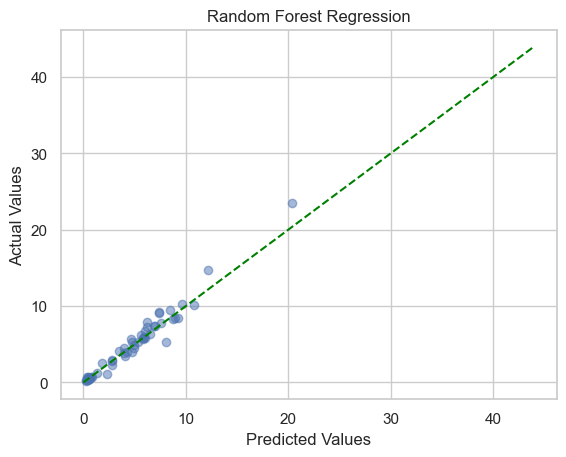

In [1067]:
plt.scatter(y_pred_rf, y2_test, alpha=0.5)
plt.plot(np.arange(0, 45), np.arange(0, 45), color='green', linestyle='--')
plt.title('Random Forest Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [894]:
df45=df41.copy()

In [1068]:
import pandas as pd

# Assuming df_original is your original DataFrame with selling price and other features
# Assuming model_LinearRegression is your trained linear regression model
# Assuming x2_test is your test set features

# Extract original selling price column for the test set
original_selling_price_test = df45.iloc[x2_test.index]['Selling_Price(Lakhs)']

# Make predictions using the model on the test set features
ypred = model_LinearRegression.predict(x2_test)

# Create a new DataFrame with original selling price and predicted selling price
df_predictions = pd.DataFrame({'Original_Selling_Price_Test': original_selling_price_test, 'Predicted_Selling_Price_Test': ypred})

# Display the new DataFrame
df_predictions.head()

,Original_Selling_Price_Test,Predicted_Selling_Price_Test
30,2.35,1.264483
164,0.25,-0.067055
194,4.50,4.118274
125,0.60,-0.214978
265,6.40,6.456969


In [1069]:
import pandas as pd

# Assuming df_original is your original DataFrame with selling price and other features
# Assuming model_LinearRegression is your trained linear regression model
# Assuming x2_test is your test set features

# Extract original selling price column for the test set
original_selling_price_test = df45.iloc[x2_test.index]['Selling_Price(Lakhs)']

# Make predictions using the model on the test set features
ypred = model_random_forest.predict(x2_test)

# Create a new DataFrame with original selling price and predicted selling price
df_predictions = pd.DataFrame({'Original_Selling_Price_Test': original_selling_price_test, 'Predicted_Selling_Price_Test': ypred})

# Display the new DataFrame
df_predictions.head()

,Original_Selling_Price_Test,Predicted_Selling_Price_Test
30,2.35,2.8205
164,0.25,0.2396
194,4.50,3.9401
125,0.60,0.5185
265,6.40,6.5436


In [1070]:
import pandas as pd

# Assuming df_original is your original DataFrame with selling price and other features
# Assuming model_LinearRegression is your trained linear regression model
# Assuming x2_test is your test set features

# Extract original selling price column for the test set
original_selling_price_test = df45.iloc[x2_train.index]['Selling_Price(Lakhs)']

# Make predictions using the model on the test set features
ypred = model_LinearRegression.predict(x2_train)

# Create a new DataFrame with original selling price and predicted selling price
df_predictions = pd.DataFrame({'Original_Selling_Price_Train': original_selling_price_test, 'Predicted_Selling_Price_Train': ypred})

# Display the new DataFrame
df_predictions.head()

,Original_Selling_Price_Train,Predicted_Selling_Price_Train
10,2.85,3.857773
256,8.99,8.463259
120,0.60,0.347042
33,5.50,5.552279
173,0.12,-2.391907


In [1071]:
import pandas as pd

# Assuming df_original is your original DataFrame with selling price and other features
# Assuming model_LinearRegression is your trained linear regression model
# Assuming x2_test is your test set features

# Extract original selling price column for the test set
original_selling_price_test = df45.iloc[x2_train.index]['Selling_Price(Lakhs)']

# Make predictions using the model on the test set features
ypred = model_random_forest.predict(x2_train)

# Create a new DataFrame with original selling price and predicted selling price
df_predictions = pd.DataFrame({'Original_Selling_Price_Train': original_selling_price_test, 'Predicted_Selling_Price_Train': ypred})

# Display the new DataFrame
df_predictions.head()

,Original_Selling_Price_Train,Predicted_Selling_Price_Train
10,2.85,2.5690
256,8.99,8.6792
120,0.60,0.5966
33,5.50,5.4775
173,0.12,0.1611


## Random Forest Best Model

## 3.2.3 Hyper-parameter Optimization with Cross-Validation:

In [1080]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression



# Ridge Regression
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_grid.fit(x2_train, y2_train)
best_alpha_ridge = ridge_grid.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha_ridge)

# Lasso Regression
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_grid.fit(x2_train, y2_train)
best_alpha_lasso = lasso_grid.best_params_['alpha']
lasso_model = Lasso(alpha=best_alpha_lasso)

# ElasticNet Regression
elasticnet_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}
elasticnet_grid = GridSearchCV(ElasticNet(), elasticnet_params, cv=5)
elasticnet_grid.fit(x2_train, y2_train)
best_alpha_elasticnet = elasticnet_grid.best_params_['alpha']
best_l1_ratio_elasticnet = elasticnet_grid.best_params_['l1_ratio']
elastic_net_model = ElasticNet(alpha=best_alpha_elasticnet, l1_ratio=best_l1_ratio_elasticnet)


print("Ridge Regression - Best alpha:", best_alpha_ridge)
print("Lasso Regression - Best alpha:", best_alpha_lasso)
print("ElasticNet Regression - Best alpha:", best_alpha_elasticnet)
print("ElasticNet Regression - Best L1 Ratio:", best_l1_ratio_elasticnet)

Ridge Regression - Best alpha: 10
Lasso Regression - Best alpha: 0.01
ElasticNet Regression - Best alpha: 0.1
ElasticNet Regression - Best L1 Ratio: 0.1


In [1079]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming X_train and y_train are your complete training dataset
# Split the data into training and validation sets


# Train Ridge Regression model
ridge_model = Ridge(alpha=10)
ridge_model.fit(x2_train, y2_train)
ridge_predictions = ridge_model.predict(x2_test)
ridge_mse = mean_squared_error(y2_test, ridge_predictions)

# Train Lasso Regression model
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x2_train, y2_train)
lasso_predictions = lasso_model.predict(x2_test)
lasso_mse = mean_squared_error(y2_test, lasso_predictions)

# Train ElasticNet Regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_net_model.fit(x2_train, y2_train)
elastic_net_predictions = elastic_net_model.predict(x2_test)
elastic_net_mse = mean_squared_error(y2_test, elastic_net_predictions)

# Print the mean squared error for each model on the validation set
print("Ridge Regression MSE on Validation Set:", ridge_mse)
print("Lasso Regression MSE on Validation Set:", lasso_mse)
print("ElasticNet Regression MSE on Validation Set:", elastic_net_mse)


Ridge Regression MSE on Validation Set: 2.0664350100443336
Lasso Regression MSE on Validation Set: 2.0029844979587765
ElasticNet Regression MSE on Validation Set: 2.1248636673505863


In [1075]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
    
}

grid_search = GridSearchCV(model_random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x2_train, y2_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## 3.2.4 Feature Selection

In [1081]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd




rfe_linear = RFE(model_LinearRegression, n_features_to_select=5)  # Replace 5 with the number of features you want to select
X_train_linear_selected = rfe_linear.fit_transform(x2_train, y2_train)
X_test_linear_selected = rfe_linear.transform(x2_test)
selected_features_linear = x2.columns[rfe_linear.support_]

# Random Forest with RFE

rfe_rf = RFE(model_random_forest, n_features_to_select=5)  # Replace 5 with the number of features you want to select
X_train_rf_selected = rfe_rf.fit_transform(x2_train, y2_train)
X_test_rf_selected = rfe_rf.transform(x2_test)
selected_features_rf = x2.columns[rfe_rf.support_]

# Display selected features
print("Selected features for Linear Regression:", selected_features_linear)
print("Selected features for Random Forest:", selected_features_rf)


Selected features for Linear Regression: Index(['Fuel_Type', 'Transmission', 'Age', 'Present_Price(Lakhs)', 'Owner'], dtype='object')
Selected features for Random Forest: Index(['Fuel_Type', 'Transmission', 'Age', 'Present_Price(Lakhs)',
       'Driven_kms'],
      dtype='object')


## 3.2.5 Final Model

In [1143]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


X_train_selected=['Company Name','Fuel_Type','Age',
       'Present_Price(Lakhs)','Driven_kms','Vehicle Type']
# Set the best hyperparameters for ElasticNet (replace with your actual best values)
best_alpha = 0.1
best_l1_ratio = 0.1

# Create an ElasticNet model with the best hyperparameters
final_lr = Lasso(alpha=0.01)

# Train the final model on the selected features
final_lr.fit(x2_train[X_train_selected], y2_train)

# Make predictions on the test set
y_pred_elasticnet = final_lr.predict(x2_test[X_train_selected])

# Evaluate the ElasticNet model
mse_elasticnet = mean_squared_error(y2_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y2_test, y_pred_elasticnet)

# Display evaluation metrics
print('ElasticNet Regression Model:')
print(f'Mean Squared Error: {mse_elasticnet}')
print(f'R-squared: {r2_elasticnet}')


ElasticNet Regression Model:
Mean Squared Error: 1.9719812474067984
R-squared: 0.8896205362939453


In [1144]:
final_lr.score(x2_test[X_train_selected],y2_test)

0.8896205362939453

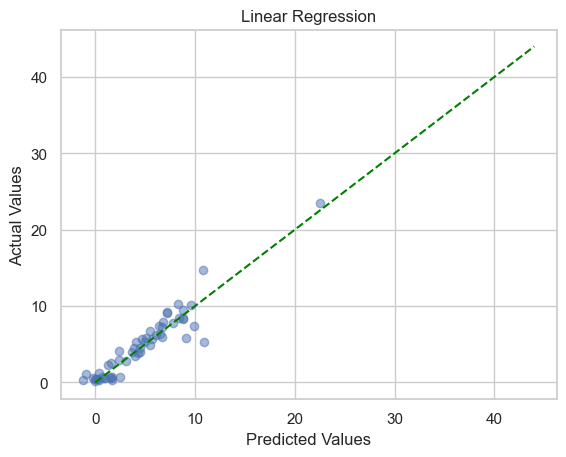

In [1229]:
plt.scatter(y_pred_elasticnet, y2_test, alpha=0.5)
plt.plot(np.arange(0, 45), np.arange(0, 45), color='green', linestyle='--')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [1226]:


# Now you can use RandomForestClassifier in your code


# Best hyperparameters from section 3.1.3
rf_best_params = {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}



# Selected features from section 3.1.4 using RFE
selected_features_rf = [ 'Vehicle Type', 'Age', 'Present_Price(Lakhs)',
       'Driven_kms','Company Name','Transmission','Owner']

# Create a Random Forest Classifier with the best hyperparameters
final_rf_model = RandomForestRegressor(**rf_best_params)

# Train the final Random Forest model using the selected features
final_rf_model.fit(x2_train[selected_features_rf], y2_train)

# Make predictions on the test set
y_pred_rf1 = final_rf_model.predict(x2_test[selected_features_rf])




In [1227]:
final_rf_model.score(x2_test[selected_features_rf],y2_test)

0.9461331001432344

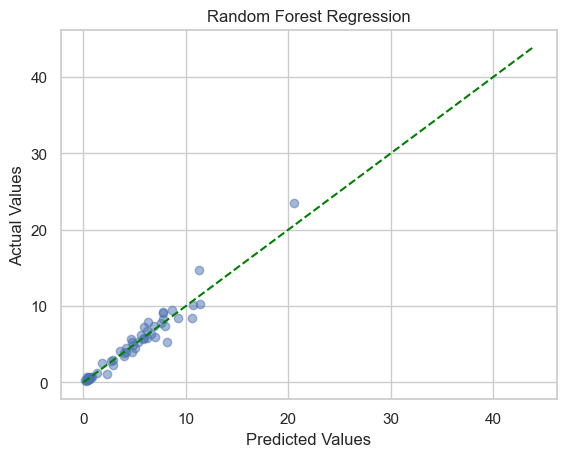

In [1228]:
plt.scatter(y_pred_rf1, y2_test, alpha=0.5)
plt.plot(np.arange(0, 45), np.arange(0, 45), color='green', linestyle='--')
plt.title('Random Forest Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Random Forest gave less error and more accurate data

# 3.2.6 Conclusion:

**1. Model Performance (Random Forest Regressor): Best Model**

3.1.3 Results:

- Initial Random Forest Regressor accuracy: 88.2%.
- After hyperparameter tuning: Improved accuracy to 89% and decreased MSE error too.
- Initial Random Forest Regressor accuracy: 95.42%.
- After hyperparameter tuning: Decreased score to 94.61% but minimized MSE error.


3.1.4 Feature Selection (RFE):

- Identified 5 features for both Linear Regression and Random Forest.

**2. Observations and Insights:**

 Cross-Validation:

- Initially, a misconfiguration issue occurred during cross-validation.
- Resolved by ensuring 'criterion' parameter in RandomForestRegressor is set to a valid string value.

 Feature Selection:

- RFE with Linear Regression and Random Forest for feature selection.
- Selected features varied between the two methods.

**3. Future Directions:**

 Cross-Validation:

- Debug and address misconfiguration for seamless cross-validation.

 Feature Selection:

- Investigate feature selection discrepancies between Linear Regression and Random Forest.
- Experiment with different feature selection methods for enhanced model interpretability.

**4. Overall Impression:**

- Despite initial challenges, hyperparameter tuning improved model accuracy.
- Feature selection methods showed variations, requiring further investigation.
- Future focus on addressing misconfigurations, exploring diverse feature selection methods, and continuous model refinement.